<a href="https://colab.research.google.com/github/heimmer/profile/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import & pre-setting

In [1]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=200
pd.options.display.max_columns=None


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

Mounted at /content/gdrive


In [3]:
excel_file_path = './agoda case dataset/Case_Study_Urgency_Message_Data.xlsx'
xls = pd.ExcelFile(excel_file_path)
# sheet_names = xls.sheet_names
# sheet_names
a = pd.read_excel(excel_file_path, sheet_name='City_A')
b = pd.read_excel(excel_file_path, sheet_name='City_B')
c = pd.read_excel(excel_file_path, sheet_name='City_C')
d = pd.read_excel(excel_file_path, sheet_name='City_D')
e = pd.read_excel(excel_file_path, sheet_name='City_E')

In [4]:
a.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        22366 non-null  int64         
 1   ADR_USD                  22366 non-null  float64       
 2   hotel_id                 22366 non-null  int64         
 3   city_id                  22366 non-null  int64         
 4   star_rating              22366 non-null  float64       
 5   accommadation_type_name  22366 non-null  object        
 6   chain_hotel              22366 non-null  object        
 7   booking_date             22366 non-null  datetime64[ns]
 8   checkin_date             22366 non-null  datetime64[ns]
 9   checkout_date            22366 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


# data integration

## data cleasing

In [6]:
#column name check
all = [b,c,d,e]
for i,name in enumerate(a.columns):
  for j,item in enumerate(all):
    if item.columns[i]!=name:
      print('The column name {} of the {} dataframe is different from dataframe_a ({}).'.format(item.columns[i],j,name))

The column name accommodation_type_name of the 1 dataframe is different from dataframe_a (accommadation_type_name).
The column name accommodation_type_name of the 2 dataframe is different from dataframe_a (accommadation_type_name).
The column name accommodation_type_name of the 3 dataframe is different from dataframe_a (accommadation_type_name).


In [7]:
a = a.rename(columns={'accommadation_type_name':'accommodation_type_name'})
b = b.rename(columns={'accommadation_type_name':'accommodation_type_name'})

## detailed data table

In [8]:
def construct_dataset(df_read,city_name):
  df = df_read.copy()
  df['days_book_in_advance'] = (df['checkin_date'] - df['booking_date']).dt.days
  df.loc[df['days_book_in_advance'] == -1, 'days_book_in_advance'] = 0
  df['weeks_book_in_advance'] = df['days_book_in_advance']//7+1
  df['stay_nights'] = (df['checkout_date'] - df['checkin_date']).dt.days
  df['booking_dow'] = df['booking_date'].dt.dayofweek+1
  df['checkin_dow'] = df['checkin_date'].dt.dayofweek+1
  df['city'] = city_name
  df = df.drop(['city_id','#'],axis=1)

  def star_map(value):
    if value <3:
      return 'low'
    elif value>=3 and value<4:
      return 'medium'
    elif value>=4:
      return 'high'
    else: return 'NA'
  df['star_type'] = df['star_rating'].apply(star_map)
  df['revenue'] = df['ADR_USD']*df['stay_nights']


  return df

In [9]:
desired_columns_order = a.columns
all_df = pd.concat([construct_dataset(a[desired_columns_order],'A')
            ,construct_dataset(b[desired_columns_order],'B')
            ,construct_dataset(c[desired_columns_order],'C')
            ,construct_dataset(d[desired_columns_order],'D')
            ,construct_dataset(e[desired_columns_order],'E')]
          , ignore_index=True).reset_index().rename(columns={'index':'order_id'})
all_df

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.060000,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.560000,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.880000,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.600000,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.080000,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49059,49059,72.580000,130890,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-02,0,1,2,6,6,E,high,145.16
49060,49060,70.020000,130890,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,1,6,6,E,high,70.02
49061,49061,921.260000,21720,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,1,6,6,E,high,921.26
49062,49062,345.086667,21720,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-03,0,1,3,6,6,E,high,1035.26


In [10]:
all_df.to_csv('all_df.csv', index=False)  # index=False 表示不写入索引列


## helper_function

In [11]:
def agg_func(df,groupby,agg,subgroup_pct=None):
  agg_df = df.groupby(groupby).agg(agg).reset_index()
  agg_df.columns = groupby + ['{}_{}'.format(key,value) for key,value in agg.items()]
  if subgroup_pct == None:
    return agg_df
  else:
    for key,value in subgroup_pct['percentage'].items():
      agg_df['{}_{}_pct'.format(key,value)] = agg_df['{}_{}'.format(key,value)] / agg_df.groupby(subgroup_pct['group'])['{}_{}'.format(key,value)].transform('sum')
    return agg_df

In [12]:
def safe_divide(a, b, default_value=0):
  try:
      result = a / b
  except ZeroDivisionError:
      result = default_value
  return result

def safe_divide_list(numbers, divisor, default_value=0):
    results = [safe_divide(num, divisor, default_value) for num in numbers]
    return results

# Price movement

## general price decrease

    days_book_in_advance  order_id_count   revenue_sum  stay_nights_sum  \
60                    60             189  68611.010000              357   
59                    59             184  66626.449000              353   
58                    58             183  60200.946667              331   
57                    57             215  73876.505000              423   
56                    56             180  64666.230000              330   

       avg_adr  order_id_count_pct  cumulative_percent  
60  192.187703            0.003852            0.003852  
59  188.743482            0.003750            0.007602  
58  181.875972            0.003730            0.011332  
57  174.648948            0.004382            0.015714  
56  195.958273            0.003669            0.019383  


<Axes: xlabel='days_book_in_advance', ylabel='avg_adr'>

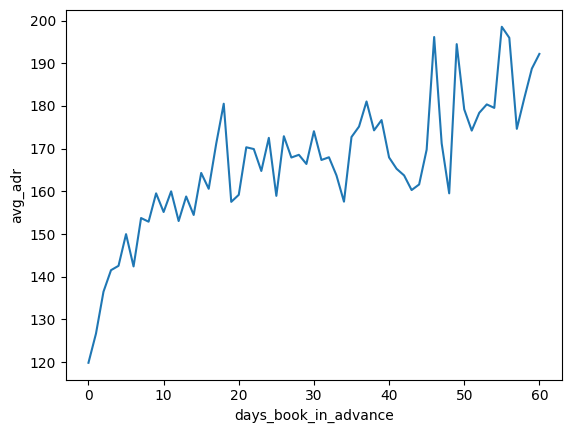

In [13]:
groupby = ['days_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['order_id_count_pct'] = cohort['order_id_count']/cohort['order_id_count'].sum()
cohort = cohort.sort_values(by='days_book_in_advance', ascending=False)
cohort['cumulative_percent'] = cohort['order_id_count_pct'].cumsum()
print(cohort.head())

sns.lineplot(data=cohort[cohort['days_book_in_advance']!=-1],x='days_book_in_advance',y='avg_adr')

Assumption：hotels are doing revenue management due to supply and demand being
unbalance

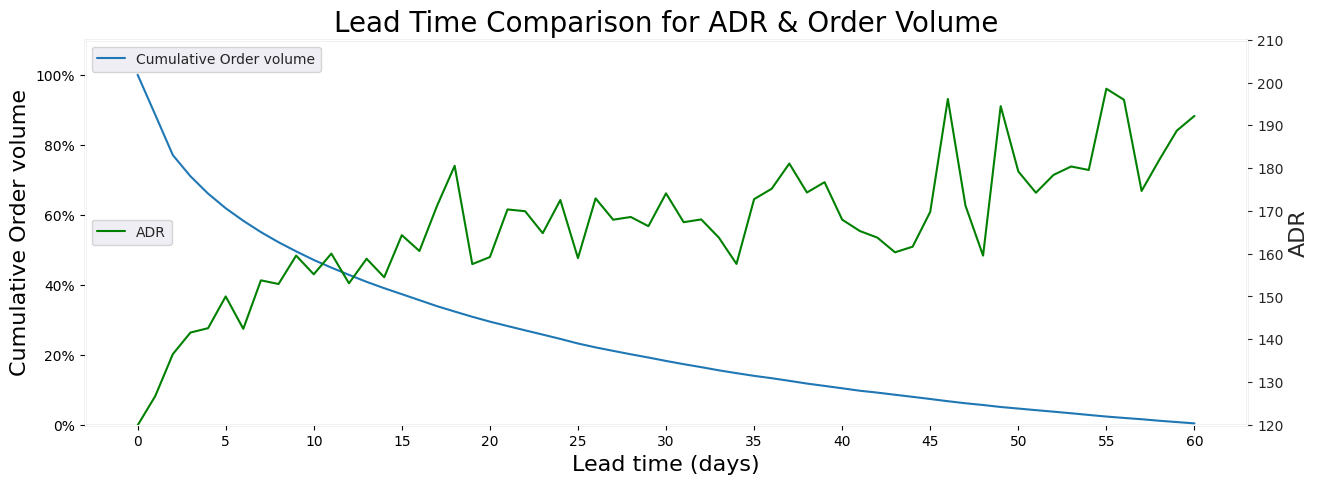

In [14]:
fig, ax2 = plt.subplots(figsize=(15,5))
sns.set_style('dark')

ax2.set_title('Lead Time Comparison for ADR & Order Volume',fontsize=20)
ax2.set_xlabel('Lead time (days)',fontsize=16)
ax2.set_ylabel('Cumulative Order volume',fontsize=16)

ax2 = sns.lineplot(data=cohort,x='days_book_in_advance',y='cumulative_percent',label='Cumulative Order volume')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
# ax2.set_xticklabels(a_cohort_df['days_book_in_advance'], rotation=90)
custom_xticks = cohort[cohort['days_book_in_advance']%5==0]['days_book_in_advance']
ax2.set_xticks(custom_xticks)
ax2.set_ylim(0,1.1) # to not cover the line
plt.legend(loc='upper left')

ax1 = ax2.twinx()
ax1.set_ylabel('ADR',fontsize=16)
ax1 = sns.lineplot(data=cohort,x='days_book_in_advance',y='avg_adr',color='g',label='ADR')
ax1.set_ylim(120,210) # to not cover the line
plt.legend(loc='center left')
plt.show()

## varify assumption

### hotel perspective

In [15]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


In [16]:
groupby = ['city','hotel_id','star_type','chain_hotel']
agg = {
    'order_id':'count'
}
hotel_avg_ord = agg_func(all_df,groupby,agg)

hotel_avg_ord['daily_avg_ord']=hotel_avg_ord['order_id_count']/92
hotel_avg_ord['daily_avg_ord_pct'] = hotel_avg_ord['daily_avg_ord']/hotel_avg_ord['daily_avg_ord'].sum()
hotel_avg_ord = hotel_avg_ord.sort_values(by='daily_avg_ord_pct', ascending=False)
hotel_avg_ord['cumulative_percent'] = hotel_avg_ord['daily_avg_ord_pct'].cumsum()

# ABC method
hotel_avg_ord['label'] = 'C'  # 默认标签为 C
hotel_avg_ord.loc[hotel_avg_ord['cumulative_percent'] <= 0.8, 'label'] = 'A'  # 累积百分比小于等于 0.8 的标为 A
hotel_avg_ord.loc[(hotel_avg_ord['cumulative_percent'] > 0.8) & (hotel_avg_ord['cumulative_percent'] <= 0.9), 'label'] = 'B'  # 累积百分比在 0.8 到 0.9 之间的标为 B


print(hotel_avg_ord.head())
hotel_avg_ord['label'].value_counts()
# sns.lineplot(data=cohort[cohort['days_book_in_advance']!=-1],x='days_book_in_advance',y='avg_adr')

    city  hotel_id star_type chain_hotel  order_id_count  daily_avg_ord  \
25     A    197996    medium   non-chain            2679      29.119565   
1      A     21272      high   non-chain            1314      14.282609   
712    D    219762    medium   non-chain            1284      13.956522   
707    D     16146      high   non-chain            1141      12.402174   
745    D   1545890      high   non-chain            1038      11.282609   

     daily_avg_ord_pct  cumulative_percent label  
25            0.054602            0.054602     A  
1             0.026781            0.081383     A  
712           0.026170            0.107553     A  
707           0.023255            0.130809     A  
745           0.021156            0.151965     A  


C    615
A    162
B    103
Name: label, dtype: int64

In [17]:
groupby = ['hotel_id','days_book_in_advance']
agg = {
    'revenue':'sum'
    ,'stay_nights':'sum'
}

hotel_adr = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
hotel_adr['avg_adr']=hotel_adr['revenue_sum']/hotel_adr['stay_nights_sum']
latest_adr = hotel_adr.sort_values(by='days_book_in_advance').groupby('hotel_id').first().reset_index()[['hotel_id','avg_adr']]
latest_adr = latest_adr.rename(columns={'avg_adr':'latest_adr'})
hotel_adr = pd.merge(hotel_adr, latest_adr, left_on='hotel_id', right_on='hotel_id', how='left')

hotel_adr['price_index'] = hotel_adr['avg_adr']/hotel_adr['latest_adr']

# hotel_adr['temp'] = hotel_adr['price_index']/hotel_adr['days_book_in_advance']
hotel_adr['exp'] = np.exp(-1 * hotel_adr['days_book_in_advance'])
hotel_adr['temp'] = hotel_adr['price_index']* hotel_adr['exp']
# hotel_adr['temp'] = np.where(np.isinf(hotel_adr['temp']), 0, hotel_adr['temp'])

hotel_adr

,hotel_id,days_book_in_advance,revenue_sum,stay_nights_sum,avg_adr,latest_adr,price_index,exp,temp
0,770,0,3007.400,17,176.905882,176.905882,1.000000,1.000000e+00,1.000000e+00
1,770,1,4139.860,23,179.993913,176.905882,1.017456,3.678794e-01,3.743011e-01
2,770,2,1306.380,5,261.276000,176.905882,1.476921,1.353353e-01,1.998795e-01
3,770,3,3956.395,23,172.017174,176.905882,0.972365,4.978707e-02,4.841123e-02
4,770,4,622.080,3,207.360000,176.905882,1.172149,1.831564e-02,2.146865e-02
...,...,...,...,...,...,...,...,...,...
12855,5084266,0,201.140,1,201.140000,201.140000,1.000000,1.000000e+00,1.000000e+00
12856,5084266,2,219.200,1,219.200000,201.140000,1.089788,1.353353e-01,1.474868e-01
12857,5084266,4,448.500,3,149.500000,201.140000,0.743263,1.831564e-02,1.361334e-02
12858,5084266,17,201.120,1,201.120000,201.140000,0.999901,4.139938e-08,4.139526e-08


In [18]:
# agg
groupby = ['hotel_id']
agg = {
    'days_book_in_advance':'sum'
    ,'temp':'sum'
}

hotel_adr_agg = agg_func(hotel_adr,groupby,agg)
hotel_adr_agg['price_index'] = hotel_adr_agg['temp_sum']/hotel_adr_agg['days_book_in_advance_sum']
# print(hotel_adr.head())
hotel_adr_agg = hotel_adr_agg[hotel_adr_agg['days_book_in_advance_sum']!=0]
hotel_adr_agg.head()

,hotel_id,days_book_in_advance_sum,temp_sum,price_index
0,770,797,1.657936,0.002080
1,1940,1291,1.598624,0.001238
2,3644,1415,1.603545,0.001133
3,8060,903,1.672698,0.001852
4,11198,1830,1.567766,0.000857


In [19]:
result = pd.merge(hotel_avg_ord, hotel_adr_agg[['hotel_id','price_index']], left_on='hotel_id', right_on='hotel_id', how='right')
result

,city,hotel_id,star_type,chain_hotel,order_id_count,daily_avg_ord,daily_avg_ord_pct,cumulative_percent,label,price_index
0,B,770,high,chain,87,0.945652,0.001773,0.765388,A,0.002080
1,D,1940,high,non-chain,264,2.869565,0.005381,0.439528,A,0.001238
2,B,3644,high,chain,167,1.815217,0.003404,0.594570,A,0.001133
3,D,8060,high,chain,95,1.032609,0.001936,0.750611,A,0.001852
4,D,11198,high,chain,732,7.956522,0.014919,0.217879,A,0.000857
...,...,...,...,...,...,...,...,...,...,...
851,B,4525158,high,chain,1,0.010870,0.000020,0.998594,C,0.001348
852,E,4754654,low,non-chain,1,0.010870,0.000020,0.997799,C,0.367879
853,E,4965158,medium,non-chain,1,0.010870,0.000020,1.000000,C,0.016596
854,D,5084266,high,non-chain,4,0.043478,0.000082,0.990095,C,0.050483


In [20]:
result.groupby(['city']).agg({'daily_avg_ord_pct':'mean','price_index':'mean'})

,daily_avg_ord_pct,price_index
city,,
A,0.002181,0.029627
B,0.000304,0.073660
C,0.000955,0.002458
D,0.002956,0.013114
E,0.000952,0.054195


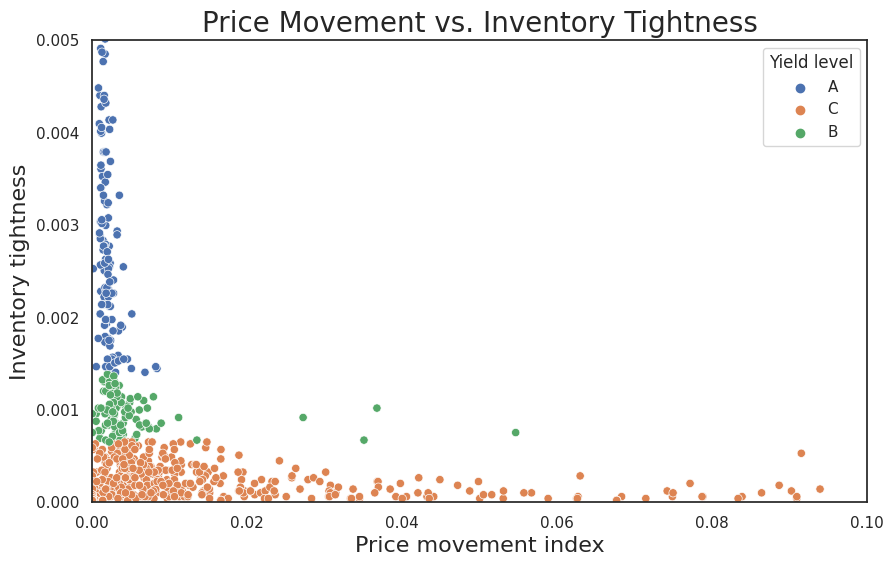

In [21]:
sns.set(style="white")
plt.figure(figsize=(10, 6))

# 绘制散点图
sns.scatterplot(data=result,x="price_index", y="daily_avg_ord_pct", hue="label")

# 设置图标题和坐标轴标签
plt.title('Price Movement vs. Inventory Tightness',fontsize=20)
plt.xlabel('Price movement index',fontsize=16)
plt.ylabel('Inventory tightness',fontsize=16)
plt.xlim(0, 0.1)  # 设置 x 轴的极限值
plt.ylim(0, 0.005)    # 设置 y 轴的极限值
# plt.xlim(1, 1.5)  # 设置 x 轴的极限值
# plt.ylim(0, 0.01)    # 设置 y 轴的极限值

# 显示图例
plt.legend(title='Yield level')

# 显示图形
plt.show()

In [ ]:
# # use absolute value rather than ratio
# #---------------------------------------------------
# groupby = ['hotel_id','days_book_in_advance']
# agg = {
#     'revenue':'sum'
#     ,'stay_nights':'sum'
# }

# hotel_adr = agg_func(all_df,groupby,agg)
# # cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
# hotel_adr['avg_adr']=hotel_adr['revenue_sum']/hotel_adr['stay_nights_sum']
# latest_adr = hotel_adr.sort_values(by='days_book_in_advance').groupby('hotel_id').first().reset_index()[['hotel_id','avg_adr']]
# latest_adr = latest_adr.rename(columns={'avg_adr':'latest_adr'})
# hotel_adr = pd.merge(hotel_adr, latest_adr, left_on='hotel_id', right_on='hotel_id', how='left')

# hotel_adr['price_index'] = (hotel_adr['avg_adr']-hotel_adr['latest_adr'])/hotel_adr['latest_adr']

# # hotel_adr['temp'] = hotel_adr['price_index']/hotel_adr['days_book_in_advance']
# hotel_adr['exp'] = np.exp(-1 * hotel_adr['days_book_in_advance'])
# hotel_adr['temp'] = hotel_adr['price_index']* hotel_adr['exp']
# # hotel_adr['temp'] = np.where(np.isinf(hotel_adr['temp']), 0, hotel_adr['temp'])

# hotel_adr





# # agg
# groupby = ['hotel_id']
# agg = {
#     'days_book_in_advance':'sum'
#     ,'temp':'sum'
# }

# hotel_adr_agg = agg_func(hotel_adr,groupby,agg)
# hotel_adr_agg['price_index'] = hotel_adr_agg['temp_sum']/hotel_adr_agg['days_book_in_advance_sum']
# # print(hotel_adr.head())
# hotel_adr_agg = hotel_adr_agg[hotel_adr_agg['days_book_in_advance_sum']!=0]
# hotel_adr_agg.head()





# result = pd.merge(hotel_avg_ord, hotel_adr_agg[['hotel_id','price_index']], left_on='hotel_id', right_on='hotel_id', how='right')
# result





# sns.set(style="white")
# plt.figure(figsize=(10, 6))

# # 绘制散点图
# sns.scatterplot(data=result,x="price_index", y="daily_avg_ord_pct", hue="city")
# # sns.scatterplot(data=result[result['city']=='D'],x="price_index", y="daily_avg_ord_pct", hue="city")

# # 设置图标题和坐标轴标签
# plt.title('Price Movement vs. Inventory Tightness',fontsize=20)
# plt.xlabel('Price movement index',fontsize=16)
# plt.ylabel('Inventory tightness',fontsize=16)
# plt.xlim(-0.005, 0.01)  # 设置 x 轴的极限值
# plt.ylim(0, 0.01)    # 设置 y 轴的极限值
# # plt.xlim(-0.005, 0)  # 设置 x 轴的极限值


# # 显示图例
# plt.legend(title='Yield level')

# # 显示图形
# plt.show()

### hotel strategy

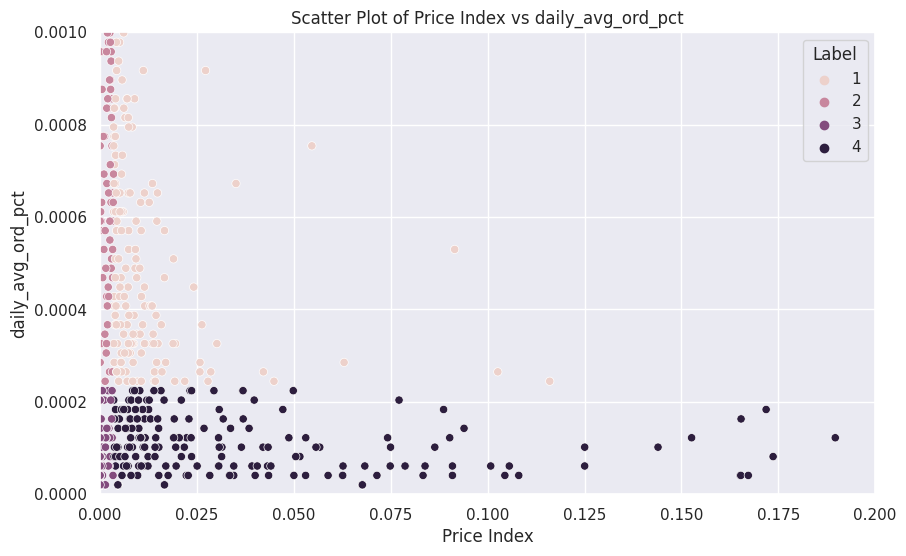

In [22]:
price_index_med = result["price_index"].median()
ord_med = result["daily_avg_ord_pct"].median()

result['stratify'] = 4
result.loc[(result["price_index"] > price_index_med) & (result["daily_avg_ord_pct"] > ord_med), 'stratify'] = 1
result.loc[(result["price_index"] <= price_index_med) & (result["daily_avg_ord_pct"] > ord_med), 'stratify'] = 2
result.loc[(result["price_index"] <= price_index_med) & (result["daily_avg_ord_pct"] <= ord_med), 'stratify'] = 3

##----------------------
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# 绘制散点图
sns.scatterplot(data=result,x="price_index", y="daily_avg_ord_pct", hue="stratify")

# 设置图标题和坐标轴标签
plt.title('Scatter Plot of Price Index vs daily_avg_ord_pct')
plt.xlabel('Price Index')
plt.ylabel('daily_avg_ord_pct')
plt.xlim(0, 0.2)  # 设置 x 轴的极限值
plt.ylim(0, 0.001)    # 设置 y 轴的极限值

# 显示图例
plt.legend(title='Label')

# 显示图形
plt.show()

In [23]:
result['stratify'].value_counts()

4    246
2    243
3    185
1    182
Name: stratify, dtype: int64

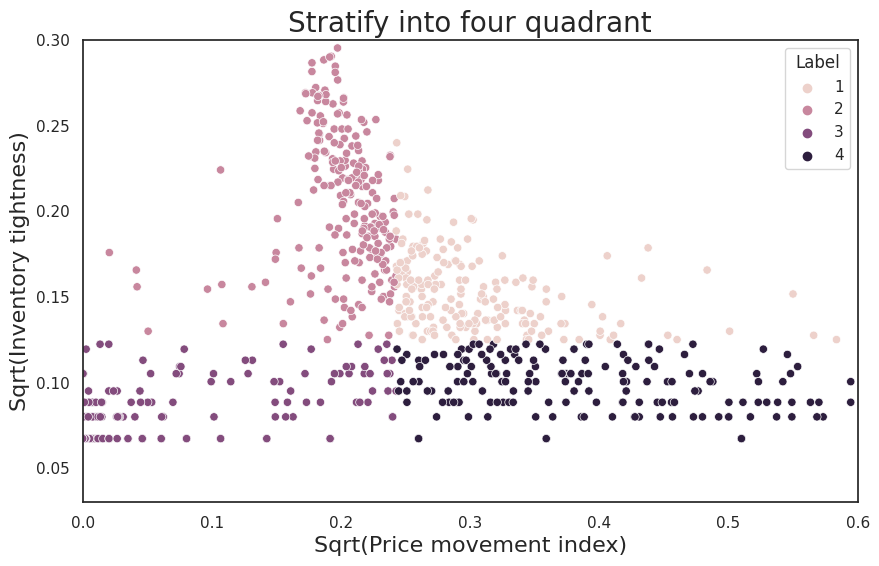

In [24]:
price_index_med = result["price_index"].median()
ord_med = result["daily_avg_ord_pct"].median()

result['stratify'] = 4
result.loc[(result["price_index"] > price_index_med) & (result["daily_avg_ord_pct"] > ord_med), 'stratify'] = 1
result.loc[(result["price_index"] <= price_index_med) & (result["daily_avg_ord_pct"] > ord_med), 'stratify'] = 2
result.loc[(result["price_index"] <= price_index_med) & (result["daily_avg_ord_pct"] <= ord_med), 'stratify'] = 3

result["log_price_index"] = np.sqrt(np.sqrt(result["price_index"]))
result["log_daily_avg_ord_pct"] = np.sqrt(np.sqrt(result["daily_avg_ord_pct"]))
# result["log_price_index"] = result["price_index"]**(1/3)
# result["log_daily_avg_ord_pct"] = result["daily_avg_ord_pct"]**(1/3)
##----------------------
sns.set(style="white")
plt.figure(figsize=(10, 6))

# 绘制散点图
sns.scatterplot(data=result,x="log_price_index", y="log_daily_avg_ord_pct", hue="stratify")

# 设置图标题和坐标轴标签
plt.title('Stratify into four quadrant',fontsize=20)
plt.xlabel('Sqrt(Price movement index)',fontsize=16)
plt.ylabel('Sqrt(Inventory tightness)',fontsize=16)
plt.xlim(0, 0.6)  # 设置 x 轴的极限值
plt.ylim(0.03, 0.3)    # 设置 y 轴的极限值

# 显示图例
plt.legend(title='Label')

# 显示图形
plt.show()

### strategy distribution

In [25]:
result.head()

,city,hotel_id,star_type,chain_hotel,order_id_count,daily_avg_ord,daily_avg_ord_pct,cumulative_percent,label,price_index,stratify,log_price_index,log_daily_avg_ord_pct
0,B,770,high,chain,87,0.945652,0.001773,0.765388,A,0.002080,2,0.213564,0.205206
1,D,1940,high,non-chain,264,2.869565,0.005381,0.439528,A,0.001238,2,0.187588,0.270838
2,B,3644,high,chain,167,1.815217,0.003404,0.594570,A,0.001133,2,0.183477,0.241540
3,D,8060,high,chain,95,1.032609,0.001936,0.750611,A,0.001852,2,0.207459,0.209768
4,D,11198,high,chain,732,7.956522,0.014919,0.217879,A,0.000857,2,0.171083,0.349492


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

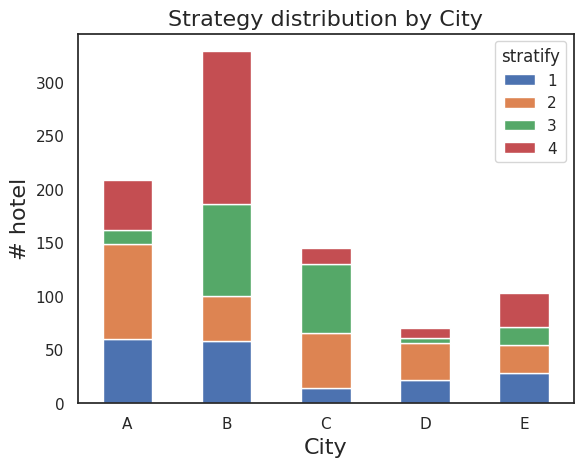

In [26]:
result_city = result.groupby(['stratify','city'])['hotel_id'].nunique().reset_index()
result_city = result_city.pivot(index='city',columns='stratify',values='hotel_id')
result_city
# pivot = city_star.pivot(index='city',columns='star_type',values='hotel_id_nunique_pct')
result_city.reset_index().set_index('city').plot(kind='bar', stacked=True)


sns.set_context({"figure.figsize": (5, 4)})
sns.set_style('white')
sns.set_palette("colorblind")
plt.title('Strategy distribution by City',fontsize=16)
plt.xlabel('City',fontsize=16)
plt.ylabel('# hotel',fontsize=16)
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

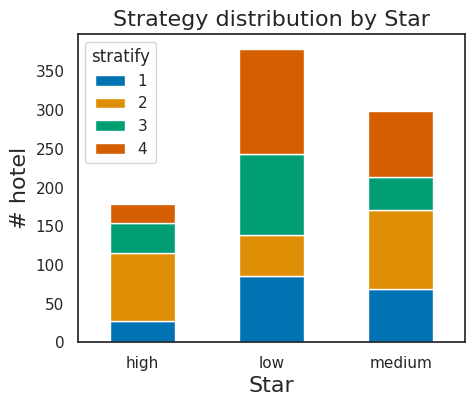

In [27]:
result_city = result.groupby(['stratify','star_type'])['hotel_id'].nunique().reset_index()
result_city = result_city.pivot(index='star_type',columns='stratify',values='hotel_id')
result_city
# pivot = city_star.pivot(index='city',columns='star_type',values='hotel_id_nunique_pct')
result_city.reset_index().set_index('star_type').plot(kind='bar', stacked=True)


sns.set_context({"figure.figsize": (5, 4)})
sns.set_style('white')
sns.set_palette("colorblind")
plt.title('Strategy distribution by Star',fontsize=16)
plt.xlabel('Star',fontsize=16)
plt.ylabel('# hotel',fontsize=16)
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'chain'), Text(1, 0, 'non-chain')])

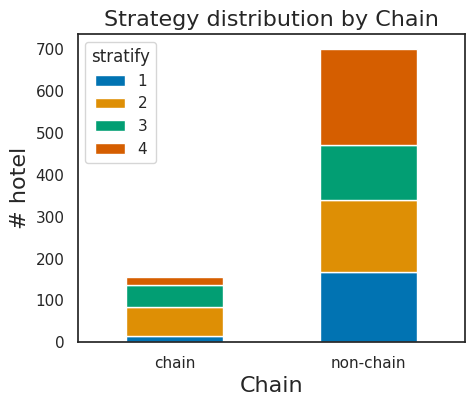

In [28]:
result_city = result.groupby(['stratify','chain_hotel'])['hotel_id'].nunique().reset_index()
result_city = result_city.pivot(index='chain_hotel',columns='stratify',values='hotel_id')
result_city
# pivot = city_star.pivot(index='city',columns='star_type',values='hotel_id_nunique_pct')
result_city.reset_index().set_index('chain_hotel').plot(kind='bar', stacked=True)


sns.set_context({"figure.figsize": (5, 4)})
sns.set_style('white')
sns.set_palette("colorblind")
plt.title('Strategy distribution by Chain',fontsize=16)
plt.xlabel('Chain',fontsize=16)
plt.ylabel('# hotel',fontsize=16)
plt.xticks(rotation=0)

  chain_hotel  weeks_book_in_advance  order_id_count   revenue_sum  \
0       chain                      1            5708  1.578308e+06   
1       chain                      2            2218  7.973259e+05   
2       chain                      3            1439  5.688576e+05   
3       chain                      4            1142  4.744728e+05   
4       chain                      5             837  3.450004e+05   

   stay_nights_sum     avg_adr  avg_adr_index  
0             8799  179.373561       1.000000  
1             3878  205.602337       1.146224  
2             2597  219.044114       1.221162  
3             2126  223.176293       1.244198  
4             1596  216.165678       1.205114  


(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

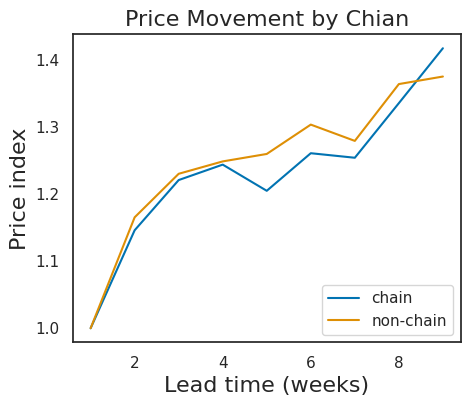

In [29]:
groupby = ['chain_hotel','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('chain_hotel')['avg_adr'].transform('min')
print(cohort.head())

sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='chain_hotel')


sns.set_context({"figure.figsize": (5, 4)})
sns.set_style('white')
plt.legend(loc='lower right')
sns.set_palette("colorblind")
plt.title('Price Movement by Chian',fontsize=16)
plt.xlabel('Lead time (weeks)',fontsize=16)
plt.ylabel('Price index',fontsize=16)
plt.xticks(rotation=0)

  city  weeks_book_in_advance  order_id_count   revenue_sum  stay_nights_sum  \
0    A                      1           10876  1.618623e+06            16433   
1    A                      2            3562  6.388998e+05             6039   
2    A                      3            2308  4.535412e+05             4111   
3    A                      4            1679  3.523790e+05             3045   
4    A                      5            1232  2.472715e+05             2206   

      avg_adr  avg_adr_index  
0   98.498330       1.000000  
1  105.795632       1.074086  
2  110.323816       1.120058  
3  115.723812       1.174881  
4  112.090433       1.137993  


(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

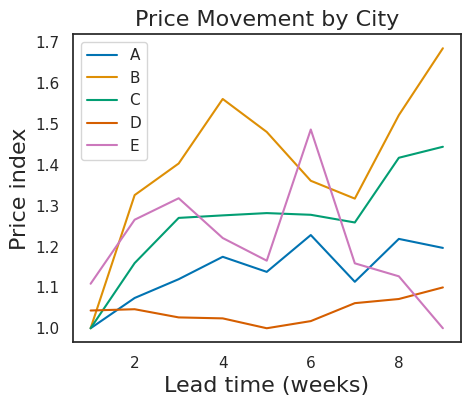

In [30]:
groupby = ['city','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('city')['avg_adr'].transform('min')
print(cohort.head())

sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='city')


sns.set_context({"figure.figsize": (5, 4)})
sns.set_style('white')
plt.legend(loc='upper left')
sns.set_palette("colorblind")
plt.title('Price Movement by City',fontsize=16)
plt.xlabel('Lead time (weeks)',fontsize=16)
plt.ylabel('Price index',fontsize=16)
plt.xticks(rotation=0)

  star_type  weeks_book_in_advance  order_id_count   revenue_sum  \
0      high                      1            9517  2.720200e+06   
1      high                      2            3223  1.214629e+06   
2      high                      3            2024  8.785049e+05   
3      high                      4            1508  6.764921e+05   
4      high                      5            1071  4.695474e+05   

   stay_nights_sum     avg_adr  avg_adr_index  
0            14578  186.596269       1.000000  
1             5682  213.767792       1.145617  
2             3811  230.518204       1.235385  
3             2865  236.122900       1.265421  
4             2043  229.832294       1.231709  


(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

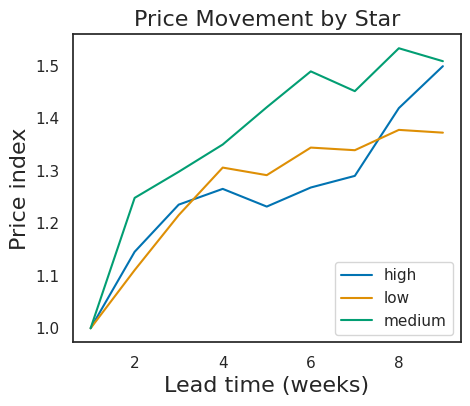

In [31]:
groupby = ['star_type','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('star_type')['avg_adr'].transform('min')
print(cohort.head())

sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='star_type')


sns.set_context({"figure.figsize": (5, 4)})
sns.set_style('white')
plt.legend(loc='lower right')
sns.set_palette("colorblind")
plt.title('Price Movement by Star',fontsize=16)
plt.xlabel('Lead time (weeks)',fontsize=16)
plt.ylabel('Price index',fontsize=16)
plt.xticks(rotation=0)

  city  weeks_book_in_advance  order_id_count   revenue_sum  stay_nights_sum  \
0    A                      1           10876  1.618623e+06            16433   
1    A                      2            3562  6.388998e+05             6039   
2    A                      3            2308  4.535412e+05             4111   
3    A                      4            1679  3.523790e+05             3045   
4    A                      5            1232  2.472715e+05             2206   

      avg_adr  avg_adr_index  
0   98.498330       1.000000  
1  105.795632       1.074086  
2  110.323816       1.120058  
3  115.723812       1.174881  
4  112.090433       1.137993  


<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

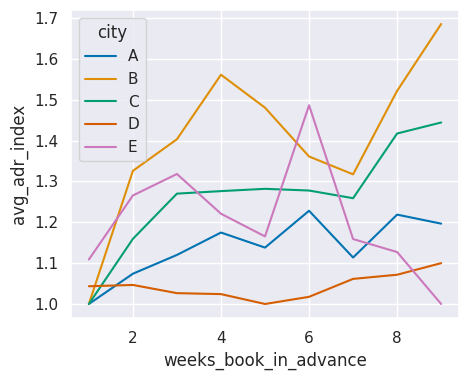

In [32]:
groupby = ['city','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('city')['avg_adr'].transform('min')
print(cohort.head())

sns.set_context({"figure.figsize": (5, 4)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='city')

### market perspective

In [33]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


In [34]:
groupby = ['checkin_date']
agg = {
    'order_id':'count'
}
checkin_avg_ord = agg_func(all_df,groupby,agg)

checkin_avg_ord['order_id_count_pct'] = checkin_avg_ord['order_id_count']/checkin_avg_ord['order_id_count'].sum()

checkin_avg_ord.head()


# hotel_avg_ord['daily_avg_ord']=hotel_avg_ord['order_id_count']/92
# hotel_avg_ord['daily_avg_ord_pct'] = hotel_avg_ord['daily_avg_ord']/hotel_avg_ord['daily_avg_ord'].sum()
# hotel_avg_ord = hotel_avg_ord.sort_values(by='daily_avg_ord_pct', ascending=False)
# hotel_avg_ord['cumulative_percent'] = hotel_avg_ord['daily_avg_ord_pct'].cumsum()

# # ABC method
# hotel_avg_ord['label'] = 'C'  # 默认标签为 C
# hotel_avg_ord.loc[hotel_avg_ord['cumulative_percent'] <= 0.8, 'label'] = 'A'  # 累积百分比小于等于 0.8 的标为 A
# hotel_avg_ord.loc[(hotel_avg_ord['cumulative_percent'] > 0.8) & (hotel_avg_ord['cumulative_percent'] <= 0.9), 'label'] = 'B'  # 累积百分比在 0.8 到 0.9 之间的标为 B


# print(hotel_avg_ord.head())
# hotel_avg_ord['label'].value_counts()
# # sns.lineplot(data=cohort[cohort['days_book_in_advance']!=-1],x='days_book_in_advance',y='avg_adr')

,checkin_date,order_id_count,order_id_count_pct
0,2016-10-01,698,0.014226
1,2016-10-02,443,0.009029
2,2016-10-03,474,0.009661
3,2016-10-04,422,0.008601
4,2016-10-05,444,0.009049


In [35]:
groupby = ['checkin_date','days_book_in_advance']
agg = {
    'revenue':'sum'
    ,'stay_nights':'sum'
}

checkin_adr = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
checkin_adr['avg_adr']=checkin_adr['revenue_sum']/checkin_adr['stay_nights_sum']

latest_adr = checkin_adr.sort_values(by='days_book_in_advance').groupby('checkin_date').first().reset_index()[['checkin_date','avg_adr']]
latest_adr = latest_adr.rename(columns={'avg_adr':'latest_adr'})
checkin_adr = pd.merge(checkin_adr, latest_adr, left_on='checkin_date', right_on='checkin_date', how='left')

checkin_adr['price_index'] = checkin_adr['avg_adr']/checkin_adr['latest_adr']

checkin_adr['temp'] = checkin_adr['price_index']*np.exp(-1 * checkin_adr['days_book_in_advance'])
checkin_adr['temp'] = np.where(np.isinf(checkin_adr['temp']), 0, checkin_adr['temp'])

checkin_adr

,checkin_date,days_book_in_advance,revenue_sum,stay_nights_sum,avg_adr,latest_adr,price_index,temp
0,2016-10-01,0,13746.02,107,128.467477,128.467477,1.000000,1.000000e+00
1,2016-10-01,1,14636.52,113,129.526726,128.467477,1.008245,3.709127e-01
2,2016-10-01,2,9964.16,70,142.345143,128.467477,1.108025,1.499548e-01
3,2016-10-01,3,8132.70,53,153.447170,128.467477,1.194444,5.946785e-02
4,2016-10-01,4,8295.82,50,165.916400,128.467477,1.291505,2.365474e-02
...,...,...,...,...,...,...,...,...
5324,2016-12-31,56,2150.96,10,215.096000,177.656038,1.210744,5.788438e-25
5325,2016-12-31,57,4403.10,22,200.140909,177.656038,1.126564,1.981392e-25
5326,2016-12-31,58,3468.41,7,495.487143,177.656038,2.789025,1.804565e-25
5327,2016-12-31,59,1211.94,7,173.134286,177.656038,0.974548,2.319683e-26


In [36]:
# agg
groupby = ['checkin_date']
agg = {
    'days_book_in_advance':'sum'
    ,'temp':'sum'
}

checkin_adr_agg = agg_func(checkin_adr,groupby,agg)
checkin_adr_agg['price_index'] = checkin_adr_agg['temp_sum']/checkin_adr_agg['days_book_in_advance_sum']
# print(hotel_adr.head())
checkin_adr_agg = checkin_adr_agg[checkin_adr_agg['days_book_in_advance_sum']!=0]
checkin_adr_agg.head()

,checkin_date,days_book_in_advance_sum,temp_sum,price_index
0,2016-10-01,1717,1.616232,0.000941
1,2016-10-02,1740,1.785096,0.001026
2,2016-10-03,1625,1.715955,0.001056
3,2016-10-04,1475,1.586534,0.001076
4,2016-10-05,1464,1.714740,0.001171


In [37]:
checkin_result = pd.merge(checkin_avg_ord, checkin_adr_agg[['checkin_date','price_index']], left_on='checkin_date', right_on='checkin_date', how='right')
checkin_result

,checkin_date,order_id_count,order_id_count_pct,price_index
0,2016-10-01,698,0.014226,0.000941
1,2016-10-02,443,0.009029,0.001026
2,2016-10-03,474,0.009661,0.001056
3,2016-10-04,422,0.008601,0.001076
4,2016-10-05,444,0.009049,0.001171
5,2016-10-06,486,0.009905,0.000888
6,2016-10-07,671,0.013676,0.000980
7,2016-10-08,753,0.015347,0.000861
8,2016-10-09,525,0.010700,0.000953
9,2016-10-10,384,0.007827,0.001304


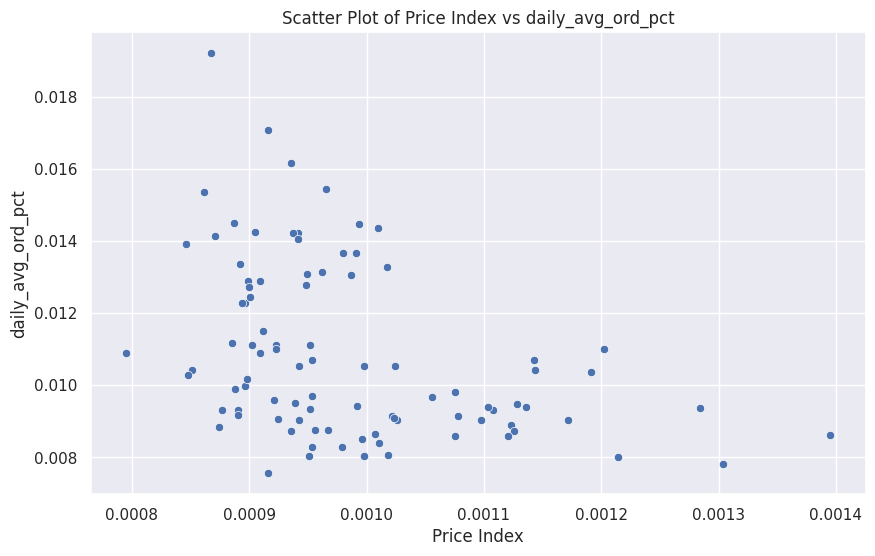

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# 绘制散点图
sns.scatterplot(data=checkin_result,x="price_index", y="order_id_count_pct")

# 设置图标题和坐标轴标签
plt.title('Scatter Plot of Price Index vs daily_avg_ord_pct')
plt.xlabel('Price Index')
plt.ylabel('daily_avg_ord_pct')
# plt.xlim(0, 0.1)  # 设置 x 轴的极限值
# plt.ylim(0, 0.005)    # 设置 y 轴的极限值



# 显示图形
plt.show()

# Customer behavior pattern

## booking day

   booking_dow  stay_nights_sum  order_id_count   revenue_sum     avg_adr
0            1            12788            7510  1.969672e+06  154.024987
1            2            12773            7568  1.965379e+06  153.869820
2            3            12498            7440  1.916383e+06  153.335167
3            4            12366            7352  1.914405e+06  154.811949
4            5            11726            7071  1.805663e+06  153.987995
5            6             9893            6019  1.469864e+06  148.576211
6            7            10201            6104  1.511199e+06  148.142224


Text(0, 0.5, 'ADR')

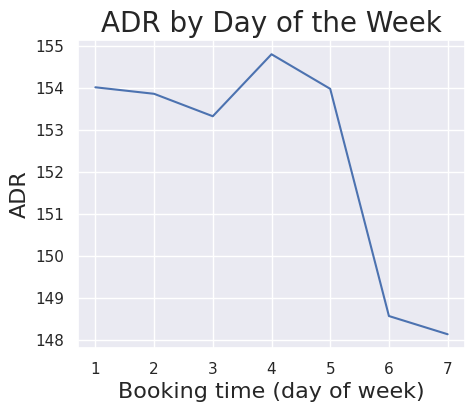

In [39]:
groupby = ['booking_dow']
agg = {
    'stay_nights':'sum'
    ,'order_id':'count'
    ,'revenue':'sum'
}

booking_dow = agg_func(all_df,groupby,agg)
booking_dow['avg_adr'] = booking_dow['revenue_sum']/booking_dow['stay_nights_sum']
print(booking_dow)

sns.lineplot(data=booking_dow,x='booking_dow',y='avg_adr')


sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('white')
plt.title('ADR by Day of the Week',fontsize=20)
plt.xlabel('Booking time (day of week)',fontsize=16)
plt.ylabel('ADR',fontsize=16)


Text(0, 0.5, 'Order volume')

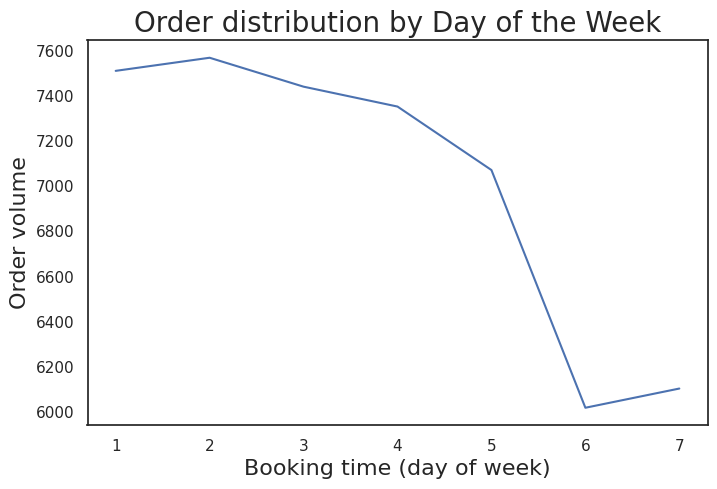

In [40]:
sns.lineplot(data=booking_dow,x='booking_dow',y='order_id_count')
sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('white')
plt.title('Order distribution by Day of the Week',fontsize=20)
plt.xlabel('Booking time (day of week)',fontsize=16)
plt.ylabel('Order volume',fontsize=16)

    checkin_dow  weeks_book_in_advance  stay_nights_sum    revenue_sum  \
0             1                      1             4108  510616.995476   
1             1                      2             1523  230068.947333   
2             1                      3             1084  160238.853333   
3             1                      4              756  115929.013500   
4             1                      5              639  101046.441667   
5             1                      6              494   83527.040000   
6             1                      7              410   66862.876667   
7             1                      8              309   50398.935000   
8             1                      9              197   31477.009000   
9             2                      1             4319  522674.956667   
10            2                      2             1633  234752.953333   
11            2                      3              974  134680.335000   
12            2                      4

Text(44.57772641782407, 0.5, 'ADR')

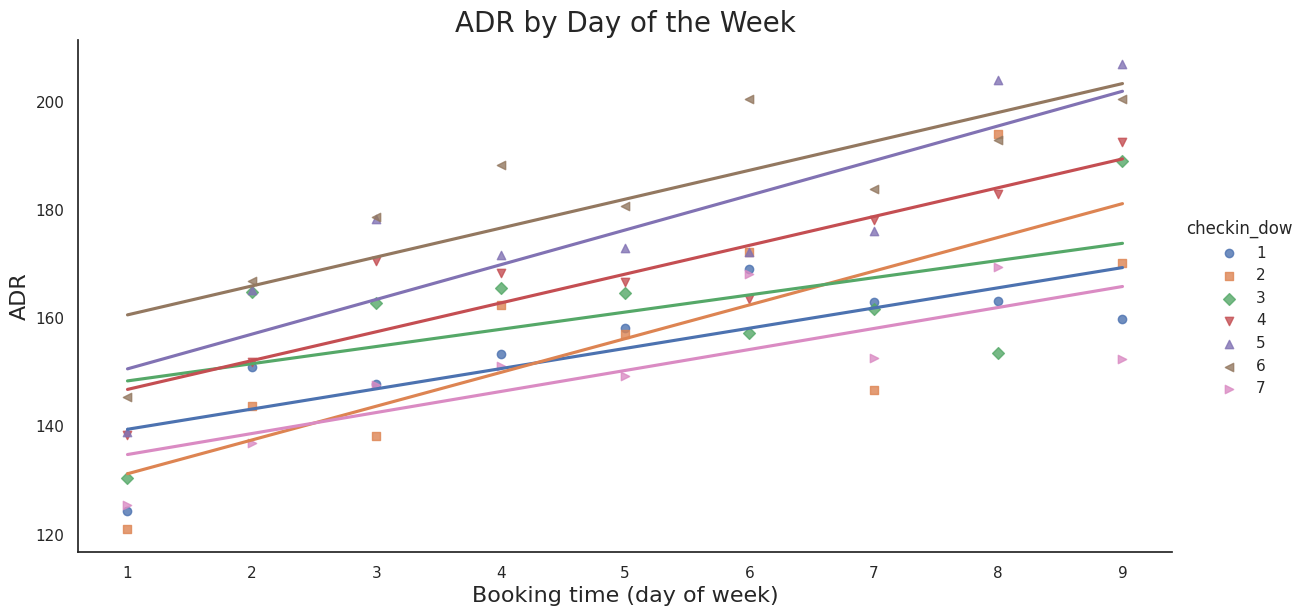

In [41]:
groupby = ['checkin_dow','weeks_book_in_advance']
agg = {
    'stay_nights':'sum'
    ,'revenue':'sum'
}

checkin_cohort = agg_func(all_df,groupby,agg)
checkin_cohort['avg_adr'] = checkin_cohort['revenue_sum']/checkin_cohort['stay_nights_sum']
print(checkin_cohort)



sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('white')
# sns.lineplot(data=checkin_cohort,x='weeks_book_in_advance',y='avg_adr',hue='checkin_dow')
# # 使用seaborn绘制散点图
# sns.scatterplot(data=checkin_cohort, x='weeks_book_in_advance', y='avg_adr', hue='checkin_dow', s=100)

# # 添加线性拟合的虚线
# sns.regplot(data=checkin_cohort, x='weeks_book_in_advance', y='avg_adr', scatter=False, ax=plt.gca(), color='gray', ci=None)
sns.lmplot(data=checkin_cohort, x='weeks_book_in_advance', y='avg_adr', hue='checkin_dow', ci=None, markers=["o", "s", "D", "v", "^", "<", ">"], height=6, aspect=2)

plt.title('ADR by Day of the Week',fontsize=20)
plt.xlabel('Booking time (day of week)',fontsize=16)
plt.ylabel('ADR',fontsize=16)


only see weekend

In [70]:
all_df

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.060000,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.560000,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.880000,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.600000,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.080000,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49059,49059,72.580000,130890,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-02,0,1,2,6,6,E,high,145.16
49060,49060,70.020000,130890,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,1,6,6,E,high,70.02
49061,49061,921.260000,21720,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,1,6,6,E,high,921.26
49062,49062,345.086667,21720,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-03,0,1,3,6,6,E,high,1035.26


   booking_dow  stay_nights_sum  order_id_count    revenue_sum     avg_adr
0            1             1216             767  189493.150000  155.833183
1            2             1465             927  224205.410000  153.041235
2            3             1536            1003  216524.383333  140.966395
3            4             2361            1564  334418.788333  141.642858
4            5             1516            1061  211742.606667  139.671904
5            6              327             188   42179.300000  128.988685
6            7              810             523  123099.050000  151.974136


Text(0, 0.5, 'ADR')

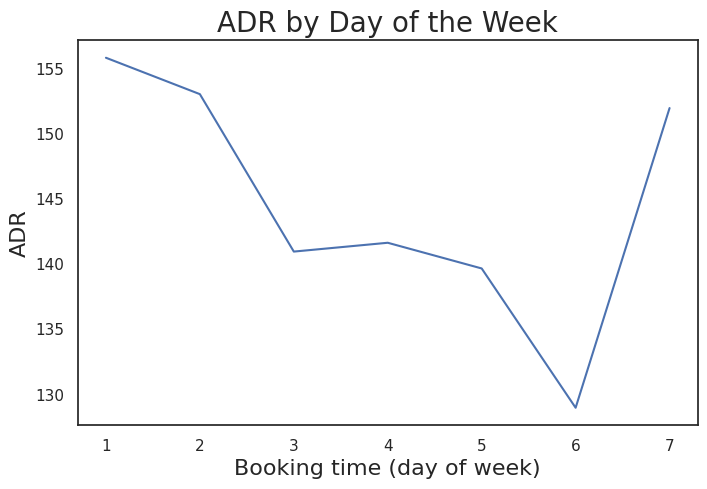

In [75]:
# only_weekend = all_df[
#         ((all_df['checkin_dow'].isin([5,6]))&(all_df['days_book_in_advance']<=6)&(all_df['days_book_in_advance']!=0)&(all_df['booking_dow']!=5))
#         | ((all_df['checkin_dow'].isin([5,6]))&(all_df['days_book_in_advance']<=6)&(all_df['days_book_in_advance']>1)&(all_df['booking_dow']==5))
#                       ]
only_weekend = all_df[(all_df['checkin_dow'].isin([5,6]))&(all_df['days_book_in_advance']<=6)&(all_df['days_book_in_advance']!=0)]
groupby = ['booking_dow']
agg = {
    'stay_nights':'sum'
    ,'order_id':'count'
    ,'revenue':'sum'
}

booking_dow = agg_func(only_weekend,groupby,agg)
booking_dow['avg_adr'] = booking_dow['revenue_sum']/booking_dow['stay_nights_sum']
print(booking_dow)

sns.lineplot(data=booking_dow,x='booking_dow',y='avg_adr')


sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('white')
plt.title('ADR by Day of the Week',fontsize=20)
plt.xlabel('Booking time (day of week)',fontsize=16)
plt.ylabel('ADR',fontsize=16)


Text(0, 0.5, 'Order volume')

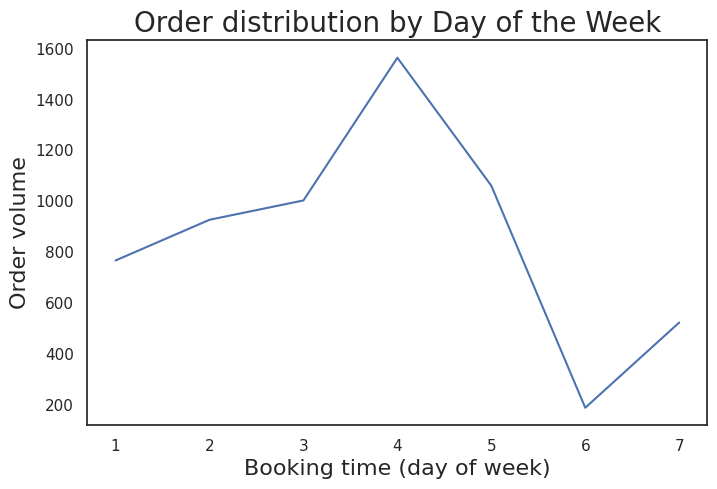

In [72]:
sns.lineplot(data=booking_dow,x='booking_dow',y='order_id_count')
sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('white')
plt.title('Order distribution by Day of the Week',fontsize=20)
plt.xlabel('Booking time (day of week)',fontsize=16)
plt.ylabel('Order volume',fontsize=16)

## stay nights

   stay_nights  days_book_in_advance_mean
0            1                  11.821805
1            2                  16.211797
2            3                  19.217866


Text(0, 0.5, 'Stay nights')

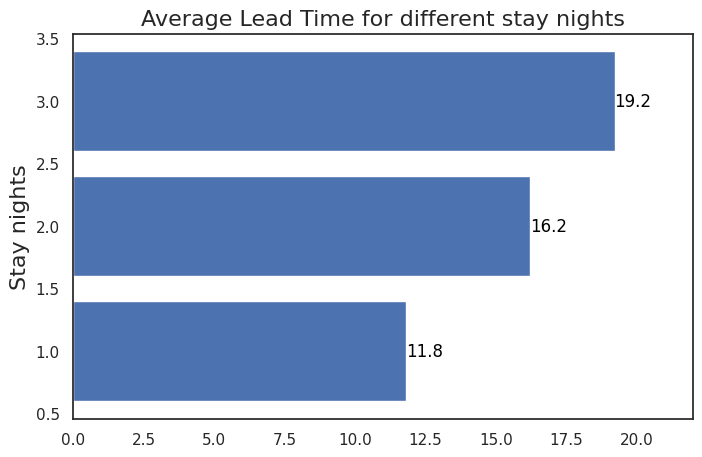

In [42]:
groupby = ['stay_nights']
agg = {
    'days_book_in_advance':'mean'
}

stay_nights = agg_func(all_df,groupby,agg)
# booking_dow['avg_adr'] = booking_dow['revenue_sum']/booking_dow['stay_nights_sum']
print(stay_nights)



plt.barh(stay_nights['stay_nights'], stay_nights['days_book_in_advance_mean'])
# 在每个柱子上添加数值标签
for i, v in enumerate(stay_nights['days_book_in_advance_mean']):
    plt.text(v, i+1, f'{v:.1f}', va='center', fontsize=12, color='black')


sns.set_context({"figure.figsize": (8, 2)})
sns.set_style('white')
plt.title('Average Lead Time for different stay nights',fontsize=16)
plt.xlim(0,22)
plt.ylabel('Stay nights',fontsize=16)


(0.0, 25.0)

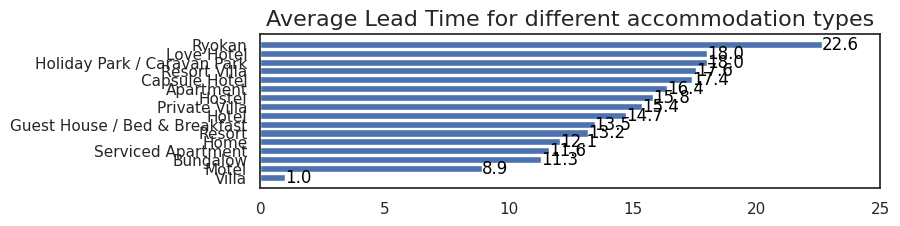

In [43]:
groupby = ['accommodation_type_name']
agg = {
    'days_book_in_advance':'mean'
}
# subgroup_pct = {
#     'group':['accommodation_type_name']
#     ,'percentage':{'order_id':'count','revenue':'sum'}
# }
type_daysadvance = agg_func(all_df,groupby,agg).sort_values(by='days_book_in_advance_mean',ascending=True)
type_daysadvance
plt.barh(type_daysadvance['accommodation_type_name'], type_daysadvance['days_book_in_advance_mean'])
# 在每个柱子上添加数值标签
for i, v in enumerate(type_daysadvance['days_book_in_advance_mean']):
    plt.text(v, i, f'{v:.1f}', va='center', fontsize=12, color='black')


sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('white')
plt.title('Average Lead Time for different accommodation types',fontsize=16)
plt.xlim(0,25)

## lead time

In [44]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


Text(0.5, 1.0, 'Booking Peak vs. Lead Time')

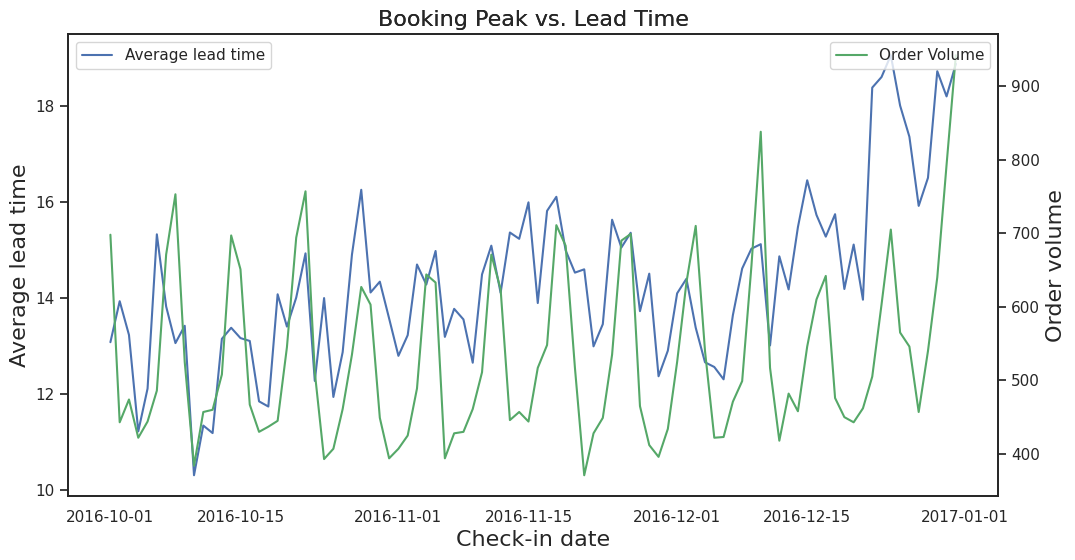

In [47]:
groupby = ['checkin_date']
agg = {
    'days_book_in_advance':'mean'
    ,'order_id':'count'
}
# subgroup_pct = {
#     'group':['accommodation_type_name']
#     ,'percentage':{'order_id':'count','revenue':'sum'}
# }

checkin_date_leadtime = agg_func(all_df,groupby,agg)


sns.set_context({"figure.figsize": (12, 6)})
sns.set_style('white')
plt.title('Booking Peak vs. Lead Time', fontsize=16)

# 创建第一个 y 轴
ax2 = sns.lineplot(data=checkin_date_leadtime, x='checkin_date', y='days_book_in_advance_mean', label='Average lead time')
ax2.set_ylabel('Average lead time', fontsize=16)
ax2.set_xlabel('Check-in date', fontsize=16)
plt.legend(loc='upper left')

# 创建第二个 y 轴
ax1 = ax2.twinx()
sns.lineplot(data=checkin_date_leadtime, x='checkin_date', y='order_id_count', color='g', label='Order Volume')
ax1.set_ylabel('Order volume', fontsize=16)
# plt.show()
# 设置图形样式和标题
sns.set_context({"figure.figsize": (8, 4)})
sns.set_style('white')
plt.legend(loc='upper right')

plt.title('Booking Peak vs. Lead Time', fontsize=16)

# 显示图形
# plt.show()

In [48]:
checkin_date_leadtime['days_book_in_advance_mean'].corr(checkin_date_leadtime['order_id_count'])

0.4750289207264046

In [49]:
spearmanr_pre = checkin_date_leadtime.sort_values(by='days_book_in_advance_mean')
from scipy.stats import spearmanr
rho, p_value = spearmanr(spearmanr_pre['days_book_in_advance_mean'], spearmanr_pre['order_id_count'])

print(f"Spearman Rank Correlation Coefficient: {rho}")
print(f"P-value: {p_value}")

Spearman Rank Correlation Coefficient: 0.46921277871128353
P-value: 2.382833158766736e-06


remove normal weekend peak

Text(0.5, 1.0, 'Booking Peak vs. Lead Time')

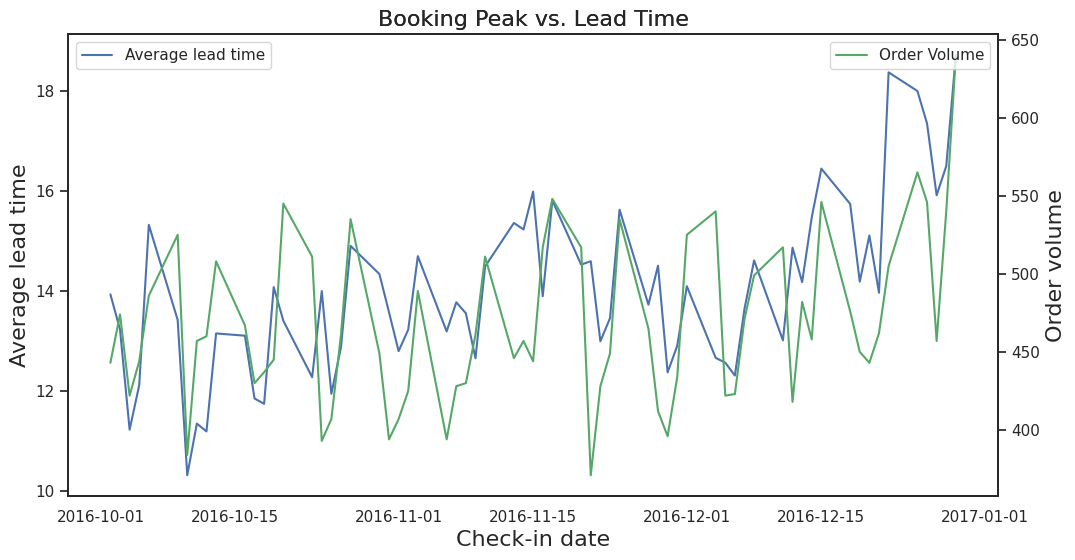

In [51]:
groupby = ['checkin_date','checkin_dow']
agg = {
    'days_book_in_advance':'mean'
    ,'order_id':'count'
}
# subgroup_pct = {
#     'group':['accommodation_type_name']
#     ,'percentage':{'order_id':'count','revenue':'sum'}
# }

checkin_date_leadtime = agg_func(all_df,groupby,agg)
checkin_date_leadtime = checkin_date_leadtime[checkin_date_leadtime['checkin_dow'].isin([1,2,3,4,7])]

sns.set_context({"figure.figsize": (12, 6)})
sns.set_style('white')
plt.title('Booking Peak vs. Lead Time', fontsize=16)

# 创建第一个 y 轴
ax2 = sns.lineplot(data=checkin_date_leadtime, x='checkin_date', y='days_book_in_advance_mean', label='Average lead time')
ax2.set_ylabel('Average lead time', fontsize=16)
ax2.set_xlabel('Check-in date', fontsize=16)
plt.legend(loc='upper left')

# 创建第二个 y 轴
ax1 = ax2.twinx()
sns.lineplot(data=checkin_date_leadtime, x='checkin_date', y='order_id_count', color='g', label='Order Volume')
ax1.set_ylabel('Order volume', fontsize=16)
# plt.show()
# 设置图形样式和标题
sns.set_context({"figure.figsize": (8, 4)})
sns.set_style('white')
plt.legend(loc='upper right')

plt.title('Booking Peak vs. Lead Time', fontsize=16)

# 显示图形
# plt.show()

In [52]:
checkin_date_leadtime['days_book_in_advance_mean'].corr(checkin_date_leadtime['order_id_count'])

0.5523824974669702

In [53]:
spearmanr_pre = checkin_date_leadtime.sort_values(by='days_book_in_advance_mean')
from scipy.stats import spearmanr
rho, p_value = spearmanr(spearmanr_pre['days_book_in_advance_mean'], spearmanr_pre['order_id_count'])

print(f"Spearman Rank Correlation Coefficient: {rho}")
print(f"P-value: {p_value}")

Spearman Rank Correlation Coefficient: 0.4516383002308581
P-value: 0.00015916313817045737


# Hotel feature

## different hotel type

(0.0, 25.0)

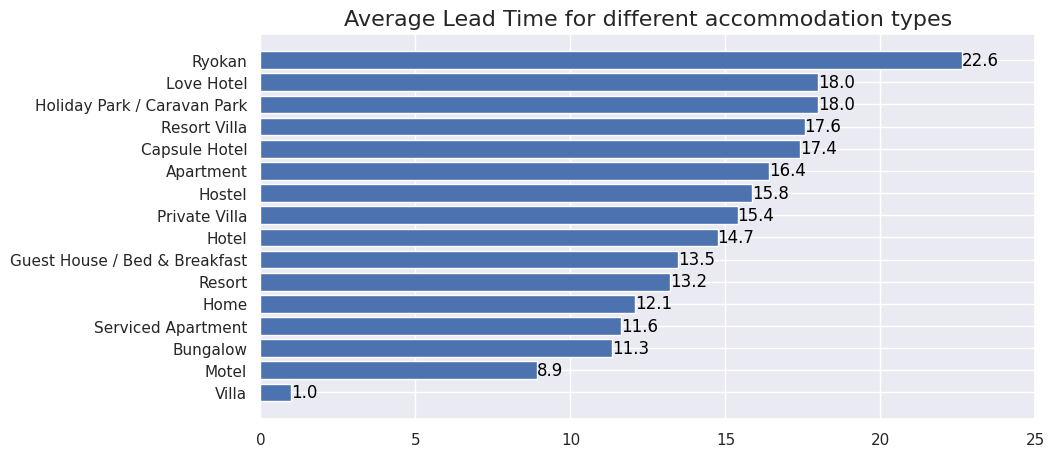

In [46]:
groupby = ['accommodation_type_name']
agg = {
    'days_book_in_advance':'mean'
}
# subgroup_pct = {
#     'group':['accommodation_type_name']
#     ,'percentage':{'order_id':'count','revenue':'sum'}
# }
type_daysadvance = agg_func(all_df,groupby,agg).sort_values(by='days_book_in_advance_mean',ascending=True)
type_daysadvance
plt.barh(type_daysadvance['accommodation_type_name'], type_daysadvance['days_book_in_advance_mean'])
# 在每个柱子上添加数值标签
for i, v in enumerate(type_daysadvance['days_book_in_advance_mean']):
    plt.text(v, i, f'{v:.1f}', va='center', fontsize=12, color='black')


sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('white')
plt.title('Average Lead Time for different accommodation types',fontsize=16)
plt.xlim(0,25)

## special city

  city  weeks_book_in_advance  order_id_count   revenue_sum  stay_nights_sum  \
0    A                      1           10876  1.618623e+06            16433   
1    A                      2            3562  6.388998e+05             6039   
2    A                      3            2308  4.535412e+05             4111   
3    A                      4            1679  3.523790e+05             3045   
4    A                      5            1232  2.472715e+05             2206   

      avg_adr  avg_adr_index  
0   98.498330       1.000000  
1  105.795632       1.074086  
2  110.323816       1.120058  
3  115.723812       1.174881  
4  112.090433       1.137993  


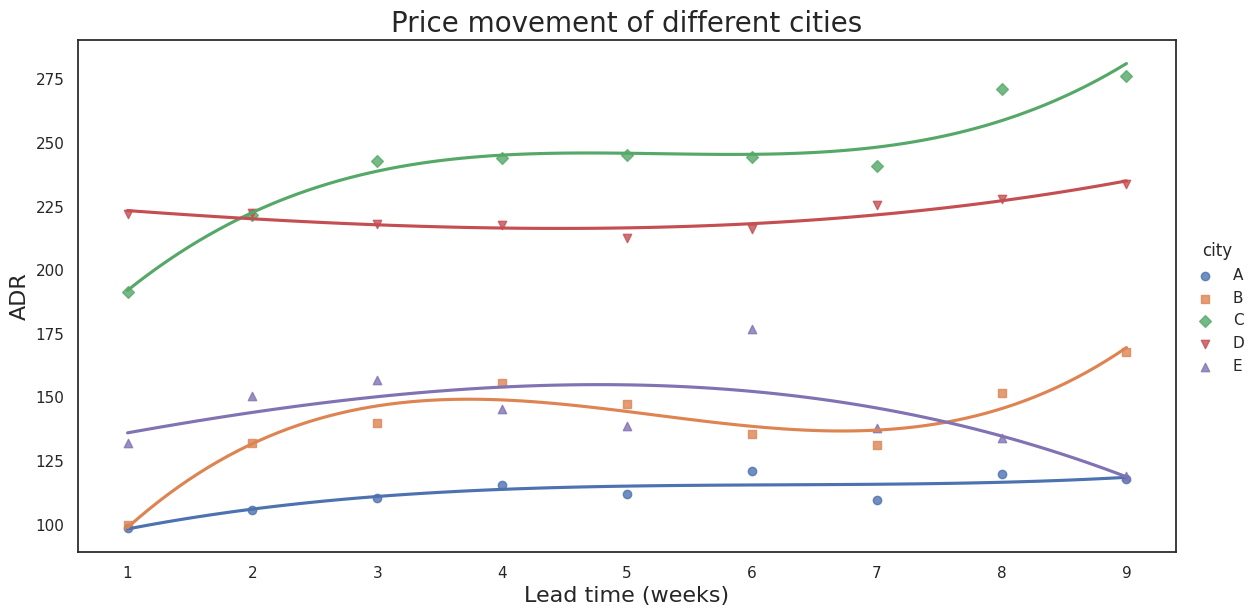

In [47]:
groupby = ['city','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('city')['avg_adr'].transform('min')
print(cohort.head())


# sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='city')
sns.lmplot(data=cohort, x='weeks_book_in_advance', y='avg_adr', hue='city', ci=None, markers=["o", "s", "D", "v", "^"], height=6, aspect=2, order=3)


sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('white')
plt.title('Price movement of different cities',fontsize=20)
plt.xlabel('Lead time (weeks)',fontsize=16)
plt.ylabel('ADR',fontsize=16)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)


  city  weeks_book_in_advance  order_id_count   revenue_sum  stay_nights_sum  \
0    A                      1           10876  1.618623e+06            16433   
1    A                      2            3562  6.388998e+05             6039   
2    A                      3            2308  4.535412e+05             4111   
3    A                      4            1679  3.523790e+05             3045   
4    A                      5            1232  2.472715e+05             2206   

      avg_adr  avg_adr_index  
0   98.498330       1.000000  
1  105.795632       1.074086  
2  110.323816       1.120058  
3  115.723812       1.174881  
4  112.090433       1.137993  


<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

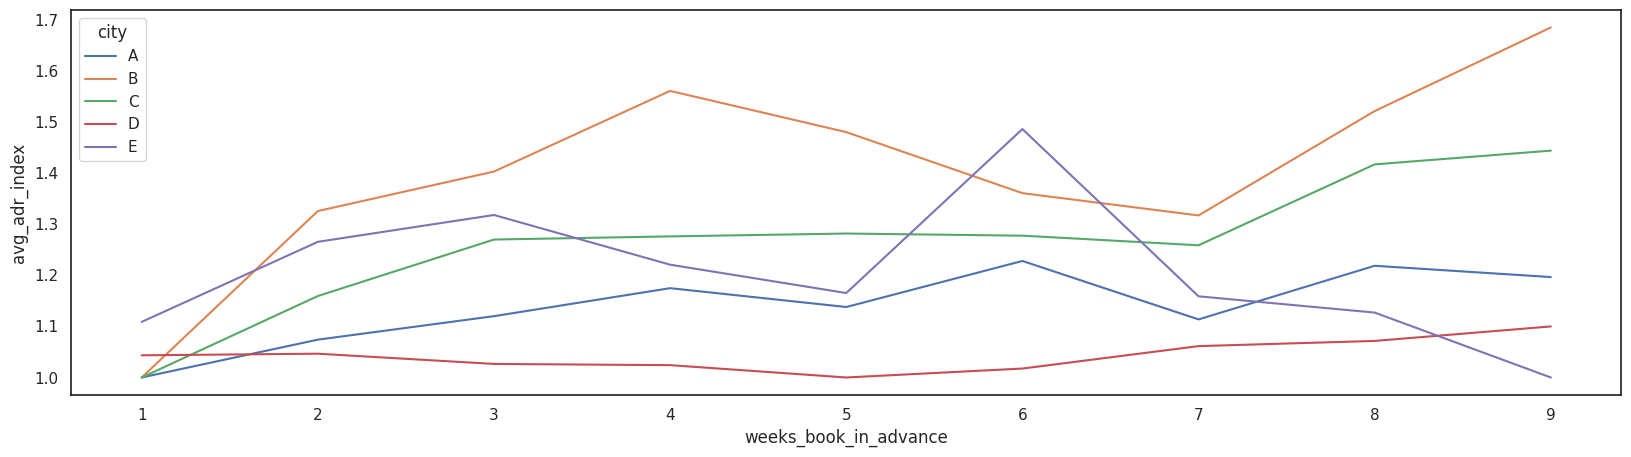

In [48]:
groupby = ['city','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('city')['avg_adr'].transform('min')
print(cohort.head())

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('white')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='city')

In [49]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
subgroup_pct = {
    'group':['accommodation_type_name']
    ,'percentage':{'order_id':'count','revenue':'sum'}
}
type_weeksadvance = agg_func(all_df,groupby,agg,subgroup_pct)
type_weeksadvance.head()

,accommodation_type_name,weeks_book_in_advance,ADR_USD_mean,order_id_count,revenue_sum,order_id_count_pct,revenue_sum_pct
0,Apartment,1,137.451042,80,21333.92,0.334728,0.232858
1,Apartment,2,215.698269,52,20489.26,0.217573,0.223639
2,Apartment,3,228.309892,31,11576.10,0.129707,0.126352
3,Apartment,4,234.577867,25,12101.78,0.104603,0.132090
4,Apartment,5,224.239815,18,9152.10,0.075314,0.099894


In [50]:
pivot_df = type_weeksadvance.pivot(index='accommodation_type_name', columns='weeks_book_in_advance', values='order_id_count_pct')
pivot_df

weeks_book_in_advance,1,2,3,4,5,6,7,8,9
accommodation_type_name,,,,,,,,,
Apartment,0.334728,0.217573,0.129707,0.104603,0.075314,0.029289,0.054393,0.033473,0.020921
Bungalow,0.591549,0.133803,0.056338,0.056338,0.035211,0.028169,0.063380,0.028169,0.007042
Capsule Hotel,0.344282,0.180049,0.116788,0.113139,0.074209,0.062044,0.040146,0.045012,0.024331
Guest House / Bed & Breakfast,0.483321,0.151559,0.102611,0.078680,0.060189,0.045323,0.038434,0.022117,0.017766
Holiday Park / Caravan Park,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN
Home,0.428571,0.142857,0.285714,0.071429,NaN,NaN,0.071429,NaN,NaN
Hostel,0.410598,0.151045,0.115357,0.096611,0.070656,0.052271,0.050829,0.035328,0.017304
Hotel,0.440309,0.165091,0.110493,0.079569,0.061877,0.048842,0.041365,0.032392,0.020062
Love Hotel,NaN,0.666667,NaN,NaN,NaN,0.333333,NaN,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Apartment'),
  Text(1, 0, 'Bungalow'),
  Text(2, 0, 'Capsule Hotel'),
  Text(3, 0, 'Guest House / Bed & Breakfast'),
  Text(4, 0, 'Holiday Park / Caravan Park'),
  Text(5, 0, 'Home'),
  Text(6, 0, 'Hostel'),
  Text(7, 0, 'Hotel'),
  Text(8, 0, 'Love Hotel'),
  Text(9, 0, 'Motel'),
  Text(10, 0, 'Private Villa'),
  Text(11, 0, 'Resort'),
  Text(12, 0, 'Resort Villa'),
  Text(13, 0, 'Ryokan'),
  Text(14, 0, 'Serviced Apartment'),
  Text(15, 0, 'Villa')])

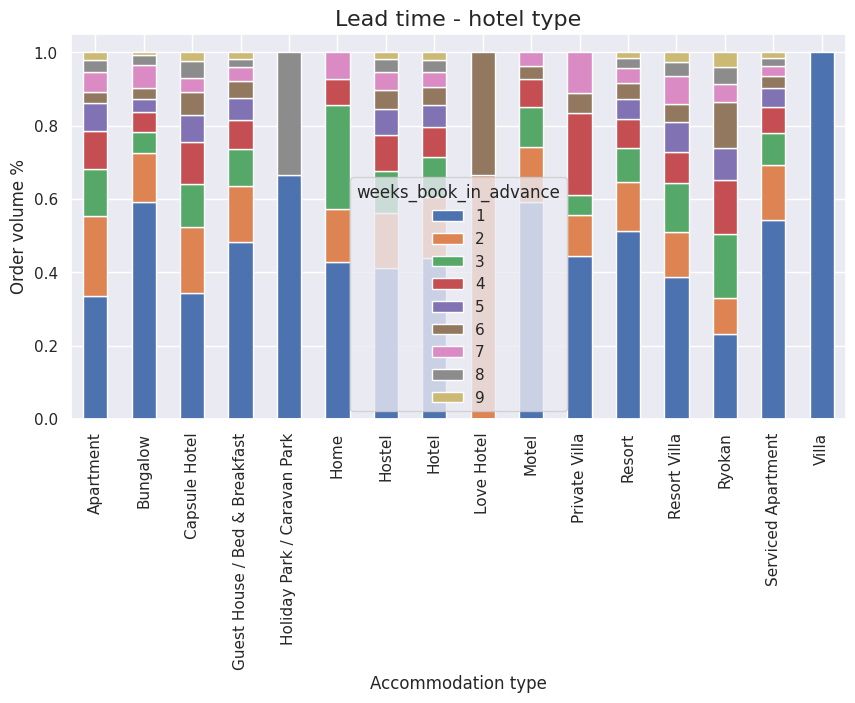

In [51]:
sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (10, 5)})

pivot_df.reset_index().set_index('accommodation_type_name').plot(kind='bar', stacked=True)

plt.title('Lead time - hotel type', fontsize=16)

#add axis titles
plt.xlabel('Accommodation type')
plt.ylabel('Order volume %')
# plt.legend(,loc='lower right',fontsize=10)

#rotate x-axis labels
plt.xticks(rotation=90)

# The following parts are discarded


## star different

  star_type  weeks_book_in_advance  order_id_count   revenue_sum  \
0      high                      1            9517  2.720200e+06   
1      high                      2            3223  1.214629e+06   
2      high                      3            2024  8.785049e+05   
3      high                      4            1508  6.764921e+05   
4      high                      5            1071  4.695474e+05   

   stay_nights_sum     avg_adr  avg_adr_index  
0            14578  186.596269       1.000000  
1             5682  213.767792       1.145617  
2             3811  230.518204       1.235385  
3             2865  236.122900       1.265421  
4             2043  229.832294       1.231709  


<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

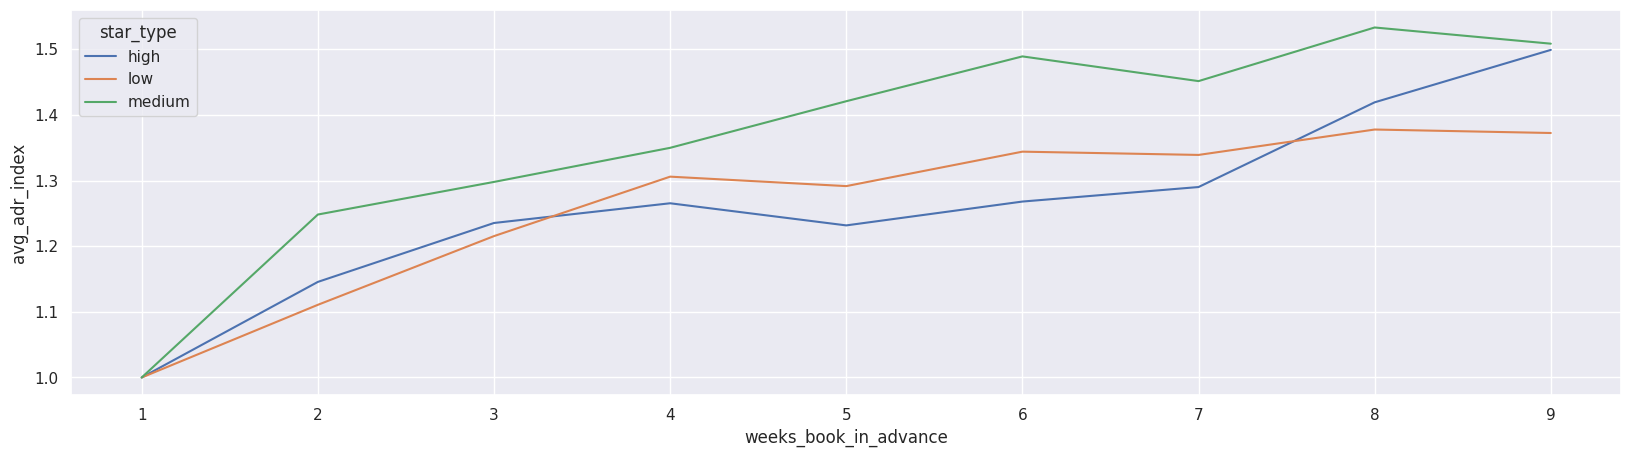

In [52]:
groupby = ['star_type','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('star_type')['avg_adr'].transform('min')
print(cohort.head())

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='star_type')

  star_type  weeks_book_in_advance  order_id_count    revenue_sum  \
0      high                      1            2113  834511.190000   
1      high                      2             856  396321.965000   
2      high                      3             499  254486.283333   
3      high                      4             347  179893.250000   
4      high                      5             256  128315.736667   

   stay_nights_sum     avg_adr  avg_adr_index  
0             3032  275.234561       1.000000  
1             1407  281.678724       1.023413  
2              903  281.823127       1.023938  
3              626  287.369409       1.044089  
4              461  278.342162       1.011291  


<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

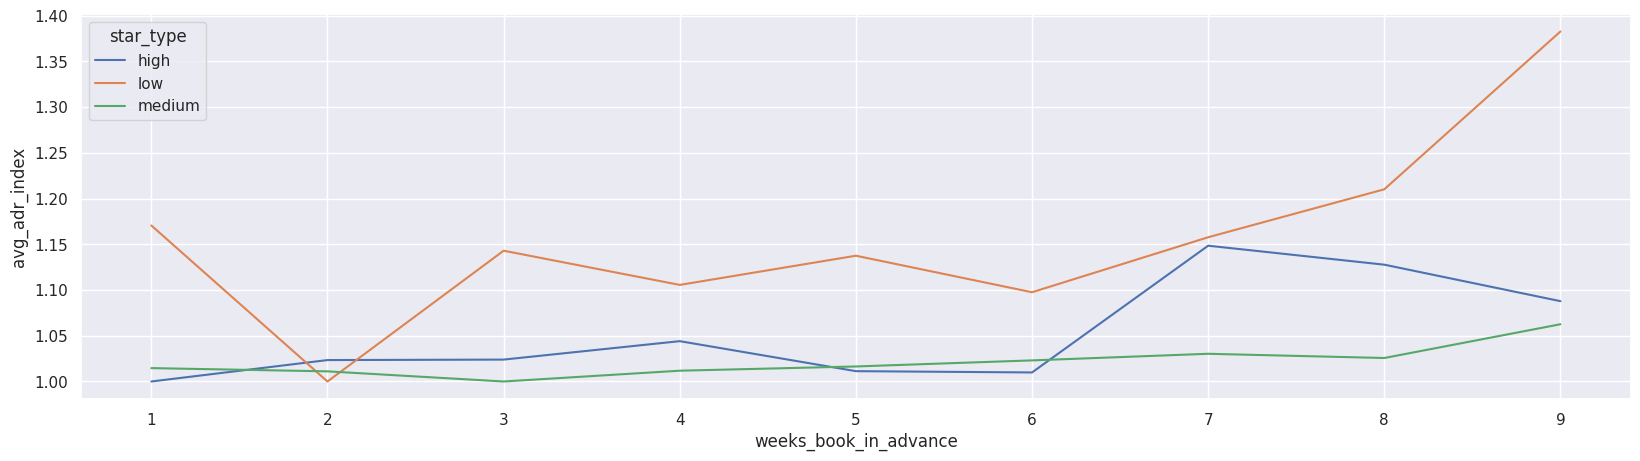

In [53]:


cohort = agg_func(all_df[all_df['city']=='D'],groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('star_type')['avg_adr'].transform('min')
print(cohort.head())

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='star_type')

## dig - 不同产量等级

excel

## Chian different

  chain_hotel  weeks_book_in_advance  order_id_count   revenue_sum  \
0       chain                      1            5708  1.578308e+06   
1       chain                      2            2218  7.973259e+05   
2       chain                      3            1439  5.688576e+05   
3       chain                      4            1142  4.744728e+05   
4       chain                      5             837  3.450004e+05   

   stay_nights_sum     avg_adr  avg_adr_index  
0             8799  179.373561       1.000000  
1             3878  205.602337       1.146224  
2             2597  219.044114       1.221162  
3             2126  223.176293       1.244198  
4             1596  216.165678       1.205114  


<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

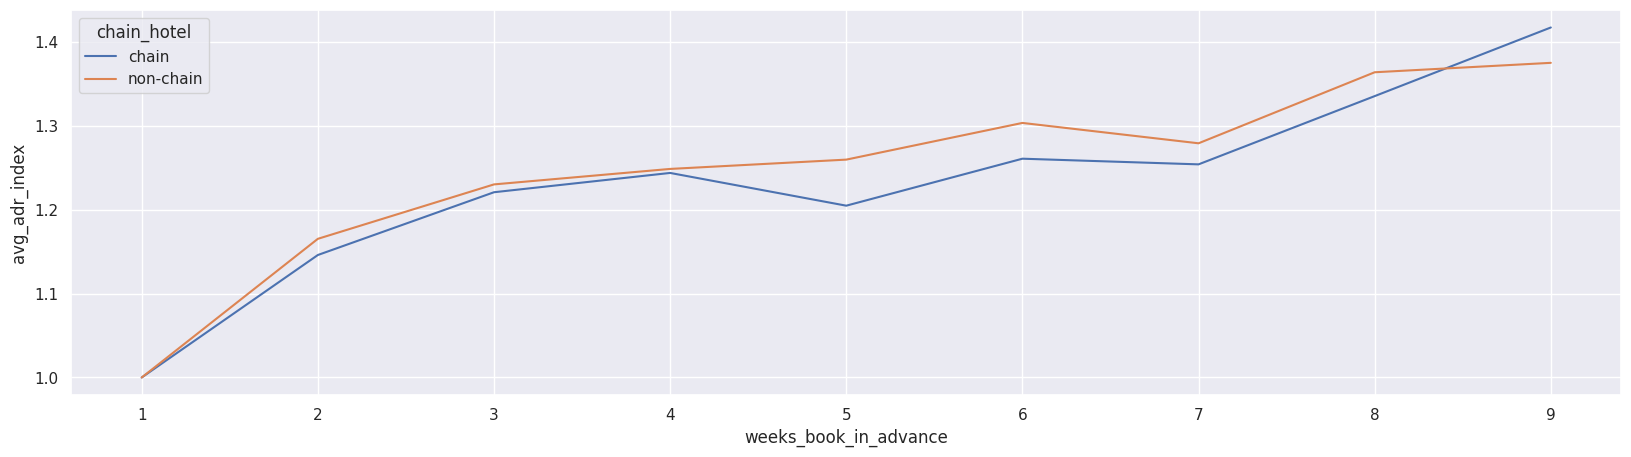

In [54]:
groupby = ['chain_hotel','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('chain_hotel')['avg_adr'].transform('min')
print(cohort.head())

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='chain_hotel')

## City D&E has different trend

  city  weeks_book_in_advance  order_id_count   revenue_sum  stay_nights_sum  \
0    A                      1           10876  1.618623e+06            16433   
1    A                      2            3562  6.388998e+05             6039   
2    A                      3            2308  4.535412e+05             4111   
3    A                      4            1679  3.523790e+05             3045   
4    A                      5            1232  2.472715e+05             2206   

      avg_adr  avg_adr_index  
0   98.498330       1.000000  
1  105.795632       1.074086  
2  110.323816       1.120058  
3  115.723812       1.174881  
4  112.090433       1.137993  


<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

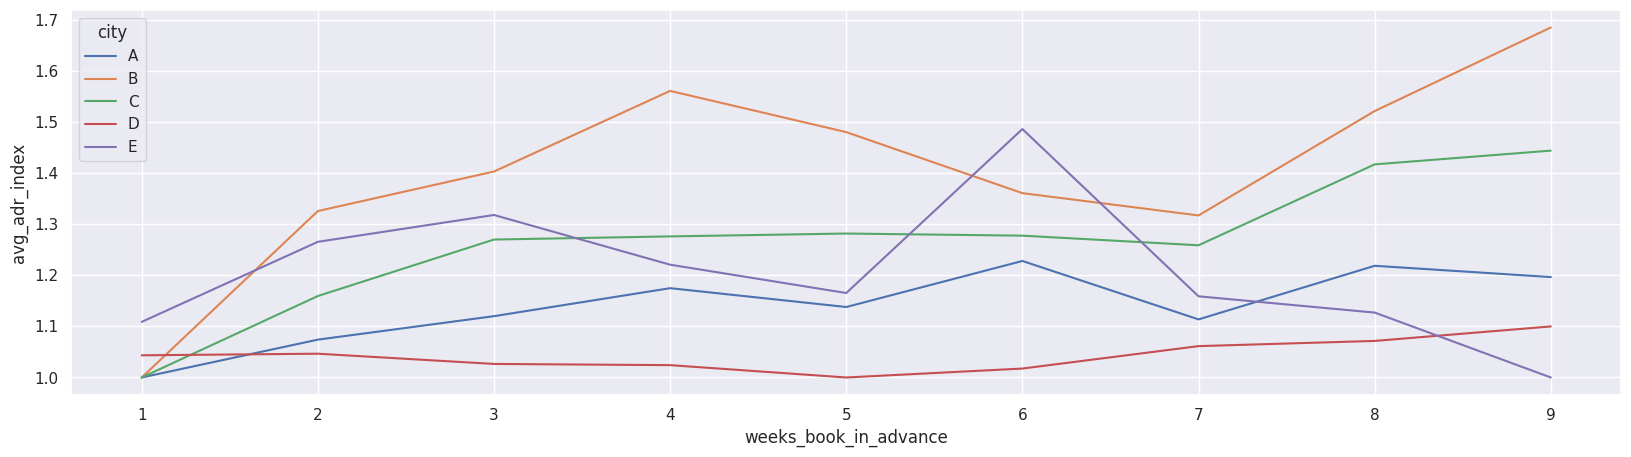

In [55]:
groupby = ['city','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('city')['avg_adr'].transform('min')
print(cohort.head())

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='city')

  city  days_book_in_advance  order_id_count  revenue_sum  stay_nights_sum  \
0    D                     0             877    239035.44             1069   
1    D                     1             923    312225.64             1308   
2    D                     2             623    204517.32              948   
3    D                     3             469    154223.33              706   
4    D                     4             450    152041.36              725   

      avg_adr  
0  223.606586  
1  238.704618  
2  215.735570  
3  218.446643  
4  209.712221  


<Axes: xlabel='days_book_in_advance', ylabel='avg_adr'>

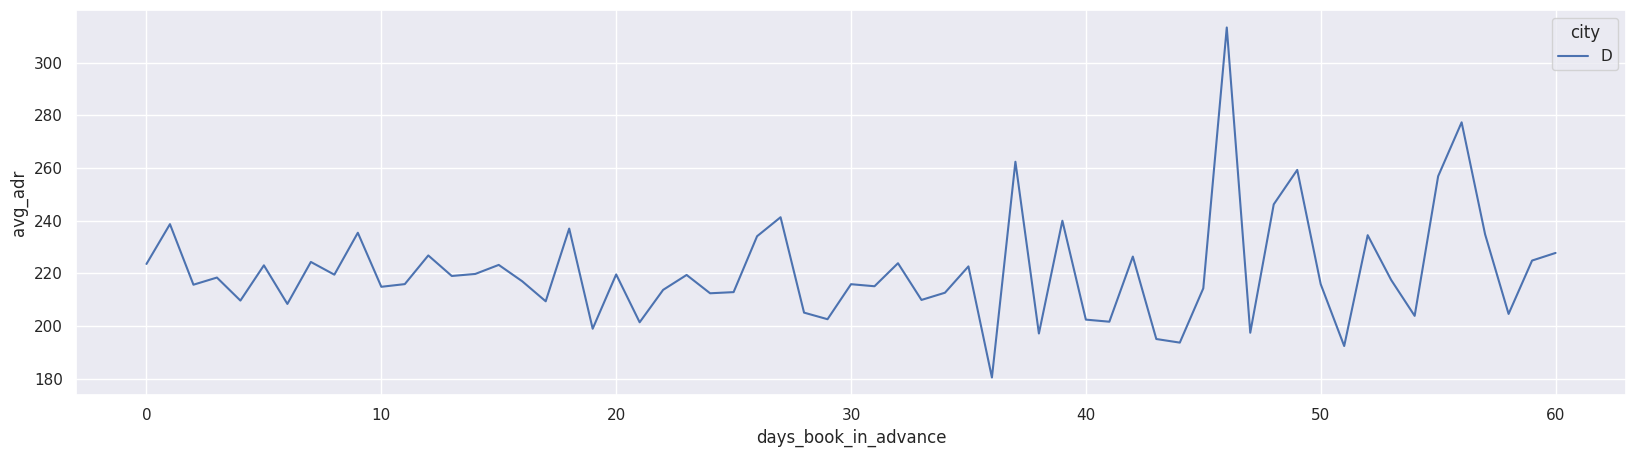

In [56]:
groupby = ['city','days_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

# cohort = agg_func(all_df,groupby,agg)
cohort = agg_func(all_df[all_df['city']=='D'],groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
print(cohort.head())

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['days_book_in_advance']!=-1],x='days_book_in_advance',y='avg_adr',hue='city')

### why

  city  days_book_in_advance star_type  order_id_count    revenue_sum  \
0    A                     0      high            1268  239212.550000   
1    A                     0       low             382   21018.560000   
2    A                     0    medium            1252  101031.760000   
3    A                     1      high            1252  280707.856667   
4    A                     1       low             394   27858.340000   

   stay_nights_sum     avg_adr  
0             1742  137.320637  
1              517   40.654855  
2             1595   63.342796  
3             2014  139.378280  
4              602   46.276312  


<Axes: xlabel='days_book_in_advance', ylabel='avg_adr'>

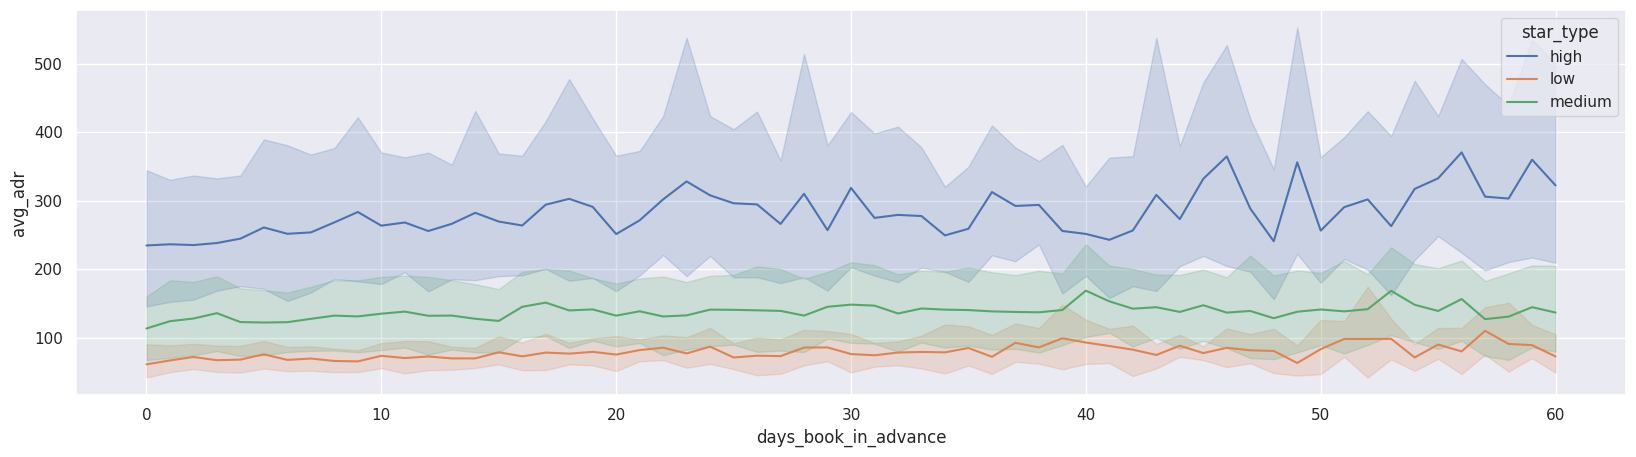

In [57]:
groupby = ['city','days_book_in_advance','star_type']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
print(cohort.head())

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['days_book_in_advance']!=-1],x='days_book_in_advance',y='avg_adr',hue='star_type')

### why - hotel type?

In [58]:
groupby = ['city','accommodation_type_name']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'hotel_id':'nunique'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
city_hotel_type = agg_func(all_df,groupby,agg,subgroup_pct)
city_hotel_type.head()

,city,accommodation_type_name,order_id_count,revenue_sum,hotel_id_nunique,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
0,A,Apartment,51,5.003340e+03,8,0.037559,0.002280,0.001284
1,A,Guest House / Bed & Breakfast,520,6.221427e+04,20,0.093897,0.023250,0.015961
2,A,Hostel,1002,6.650724e+04,31,0.145540,0.044800,0.017062
3,A,Hotel,18398,3.390222e+06,108,0.507042,0.822588,0.869743
4,A,Motel,27,9.995200e+02,2,0.009390,0.001207,0.000256


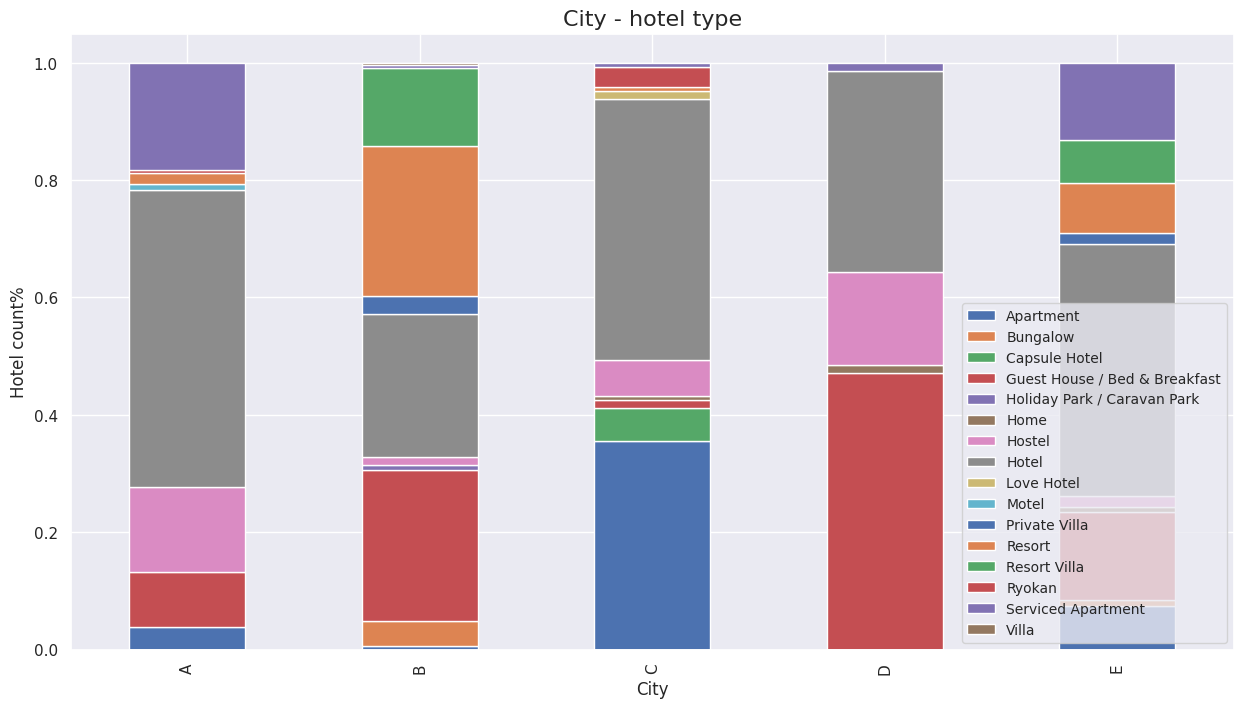

In [59]:

pivot = city_hotel_type.pivot(index='city',columns='accommodation_type_name',values='hotel_id_nunique_pct')

sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (15, 8)})

pivot.reset_index().set_index('city').plot(kind='bar', stacked=True)

plt.title('City - hotel type', fontsize=16)

#add axis titles
plt.xlabel('City')
plt.ylabel('Hotel count%')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
# plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

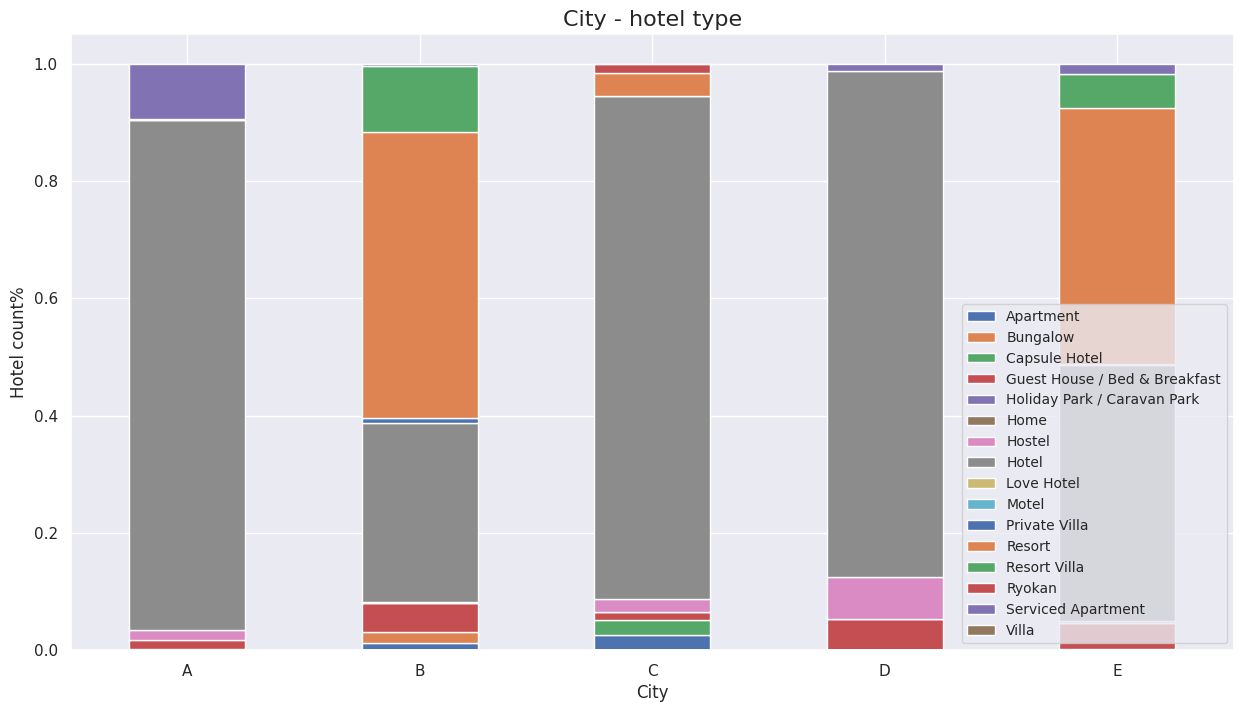

In [60]:
pivot = city_hotel_type.pivot(index='city',columns='accommodation_type_name',values='revenue_sum_pct')

sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (15, 8)})

pivot.reset_index().set_index('city').plot(kind='bar', stacked=True)

plt.title('City - hotel type', fontsize=16)

#add axis titles
plt.xlabel('City')
plt.ylabel('Hotel count%')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
plt.xticks(rotation=0)

### why - star?

In [61]:
groupby = ['city','star_type']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'hotel_id':'nunique'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
city_star = agg_func(all_df,groupby,agg,subgroup_pct)
city_star.head()

,city,star_type,order_id_count,revenue_sum,hotel_id_nunique,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
0,A,high,9475,2.575193e+06,44,0.206573,0.423634,0.660651
1,A,low,3079,2.840182e+05,80,0.375587,0.137664,0.072863
2,A,medium,9812,1.038749e+06,89,0.417840,0.438702,0.266485
3,B,high,2252,7.442755e+05,97,0.281977,0.456610,0.687498
4,B,low,702,6.263271e+04,114,0.331395,0.142336,0.057855


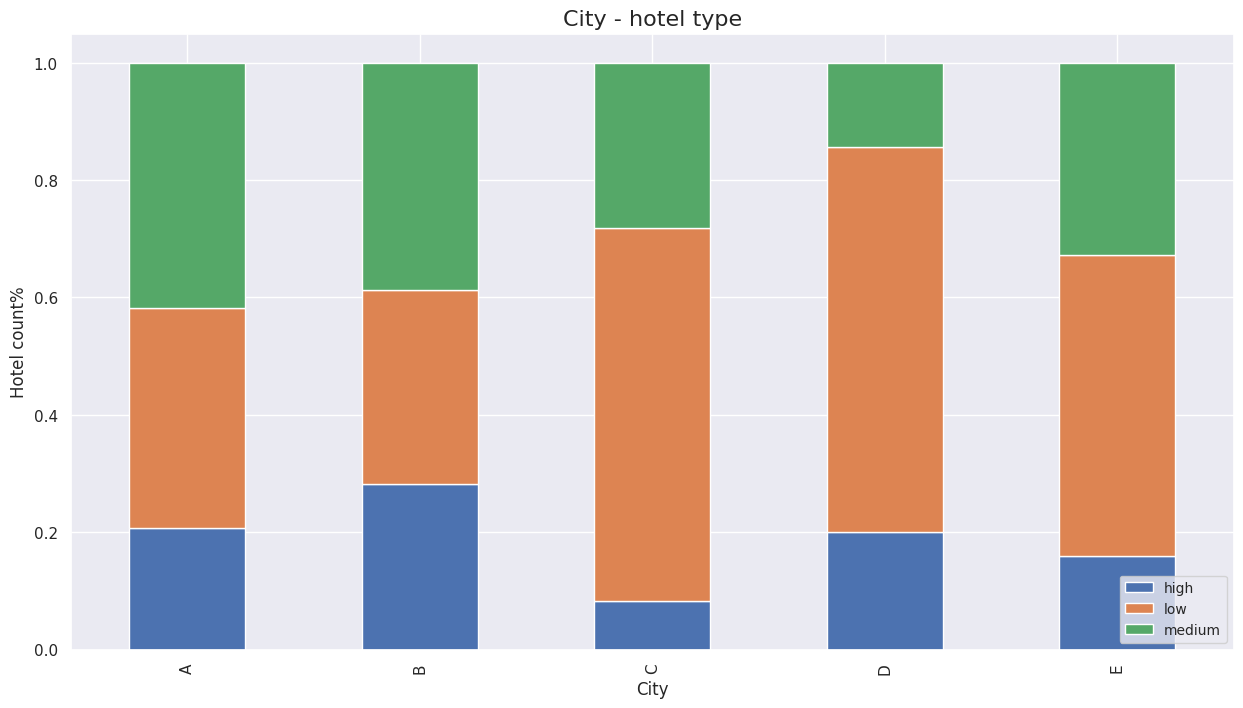

In [62]:
pivot = city_star.pivot(index='city',columns='star_type',values='hotel_id_nunique_pct')

sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (15, 8)})

pivot.reset_index().set_index('city').plot(kind='bar', stacked=True)

plt.title('City - hotel type', fontsize=16)

#add axis titles
plt.xlabel('City')
plt.ylabel('Hotel count%')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
# plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

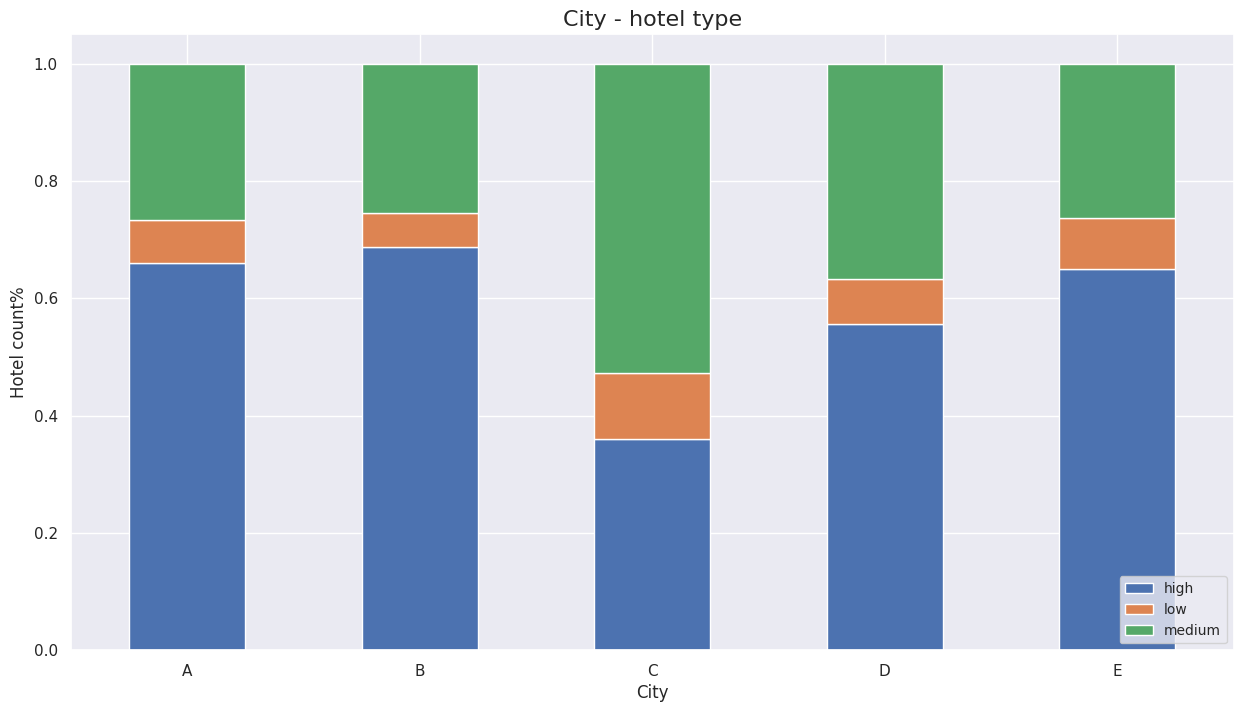

In [63]:
pivot = city_star.pivot(index='city',columns='star_type',values='revenue_sum_pct')

sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (15, 8)})

pivot.reset_index().set_index('city').plot(kind='bar', stacked=True)

plt.title('City - hotel type', fontsize=16)

#add axis titles
plt.xlabel('City')
plt.ylabel('Hotel count%')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
plt.xticks(rotation=0)

## 可能提前预订的都是高峰期？

In [64]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


In [65]:
set
subset_a = ['Apartment',
 'Bungalow',
 'Capsule Hotel',
 'Guest House / Bed & Breakfast',
 'Holiday Park / Caravan Park',
 ]
subset_b = ['Home',
 'Hostel',
 'Hotel',
 'Love Hotel',
 'Motel',
 ]
subset_c = ['Private Villa',
 'Resort',
 'Resort Villa',
 'Ryokan',
 'Serviced Apartment',
 'Villa']

In [66]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df[all_df['accommodation_type_name'].isin(subset_a)],groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('accommodation_type_name')['avg_adr'].transform('min')
cohort

,accommodation_type_name,weeks_book_in_advance,order_id_count,revenue_sum,stay_nights_sum,avg_adr,avg_adr_index
0,Apartment,1,80,21333.920000,144,148.152222,1.000000
1,Apartment,2,52,20489.260000,91,225.156703,1.519766
2,Apartment,3,31,11576.100000,52,222.617308,1.502626
3,Apartment,4,25,12101.780000,50,242.035600,1.633695
4,Apartment,5,18,9152.100000,40,228.802500,1.544374
5,Apartment,6,7,4277.740000,17,251.631765,1.698468
6,Apartment,7,13,6526.313333,27,241.715309,1.631533
7,Apartment,8,8,3464.540000,18,192.474444,1.299167
8,Apartment,9,5,2695.920000,10,269.592000,1.819696
9,Bungalow,1,84,10928.560000,155,70.506839,3.073533


<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

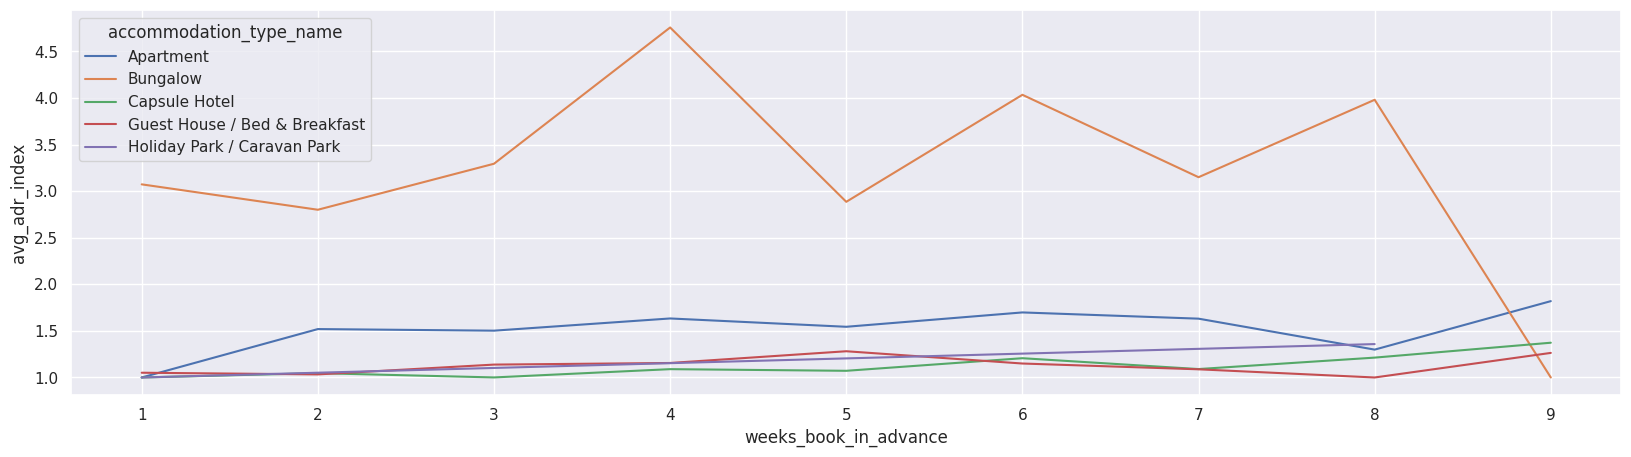

In [67]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df[all_df['accommodation_type_name'].isin(subset_a)],groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('accommodation_type_name')['avg_adr'].transform('min')
cohort.head()

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='accommodation_type_name')

<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

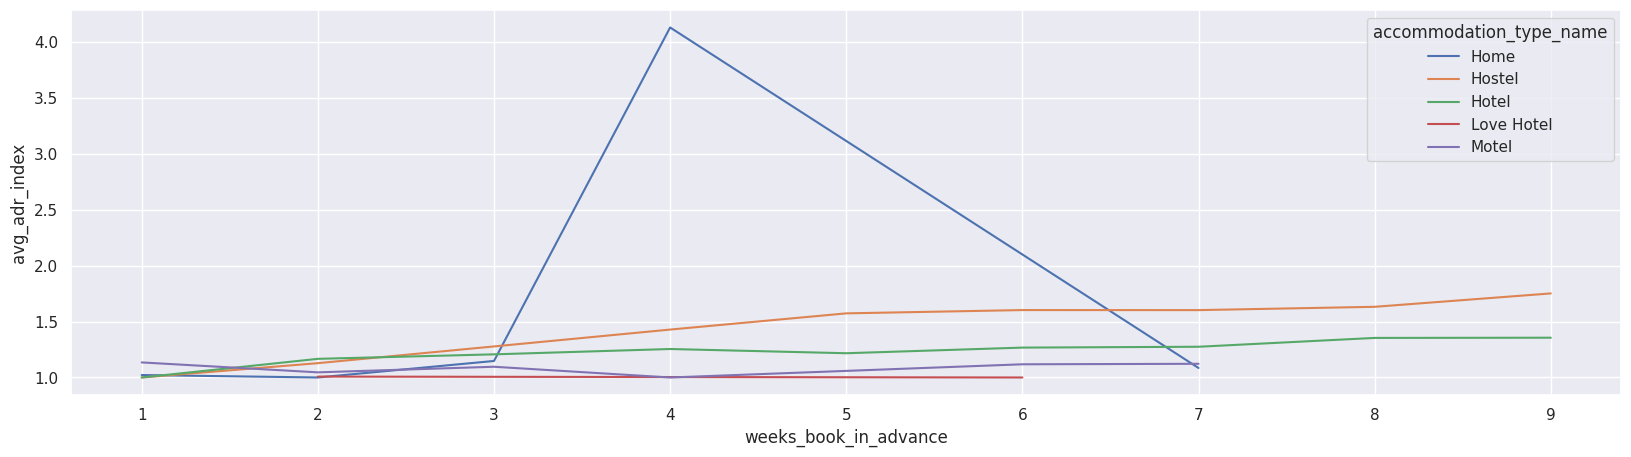

In [68]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df[all_df['accommodation_type_name'].isin(subset_b)],groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('accommodation_type_name')['avg_adr'].transform('min')
cohort.head()

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='accommodation_type_name')

<Axes: xlabel='weeks_book_in_advance', ylabel='avg_adr_index'>

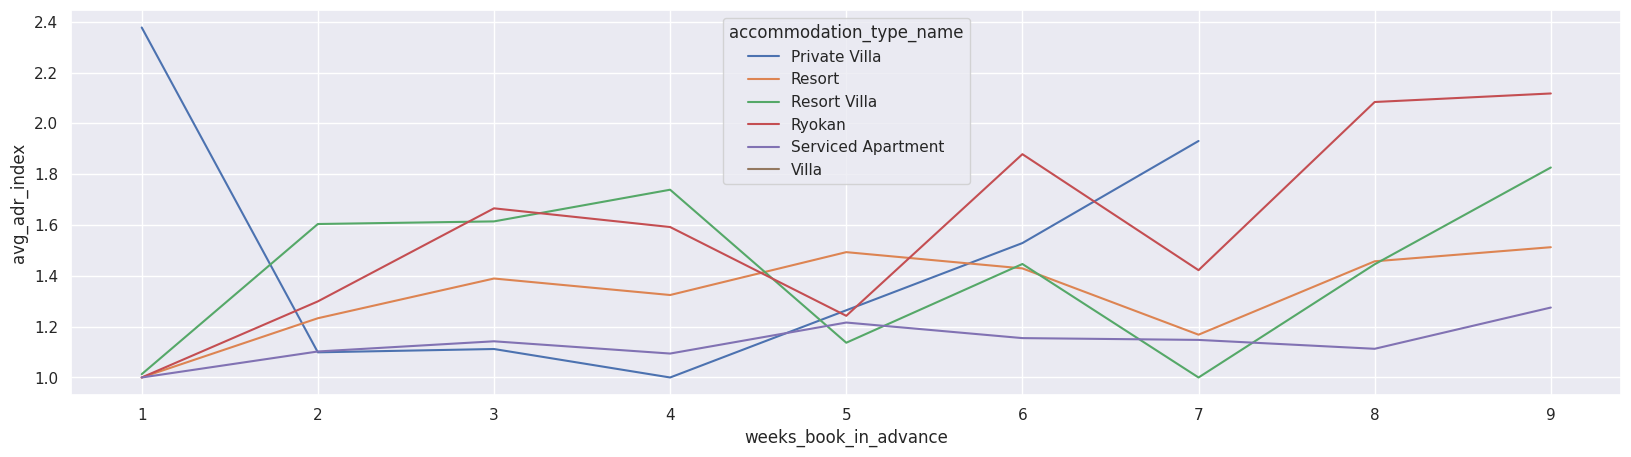

In [69]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df[all_df['accommodation_type_name'].isin(subset_c)],groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('accommodation_type_name')['avg_adr'].transform('min')
cohort.head()

sns.set_context({"figure.figsize": (20, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='accommodation_type_name')

## 酒店粒度的供需关系

In [70]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


In [71]:
groupby = ['hotel_id','star_rating','accommodation_type_name','chain_hotel']
agg = {
    'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
# cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
# cohort['avg_adr_index'] = cohort['avg_adr']/cohort.groupby('accommodation_type_name')['avg_adr'].transform('min')
cohort['daily_avg_order'] = cohort['order_id_count']/92
cohort.head()

# sns.set_context({"figure.figsize": (20, 5)})
# sns.set_style('darkgrid')
# sns.lineplot(data=cohort[cohort['weeks_book_in_advance']!=-1],x='weeks_book_in_advance',y='avg_adr_index',hue='accommodation_type_name')

,hotel_id,star_rating,accommodation_type_name,chain_hotel,order_id_count,revenue_sum,stay_nights_sum,daily_avg_order
0,770,4.0,Hotel,chain,87,31414.515000,164,0.945652
1,1940,4.0,Hotel,non-chain,264,115472.860000,452,2.869565
2,3644,5.0,Resort,chain,167,70863.970000,345,1.815217
3,8060,5.0,Hotel,chain,95,176967.660000,161,1.032609
4,11198,4.0,Hotel,chain,732,182715.561667,1016,7.956522


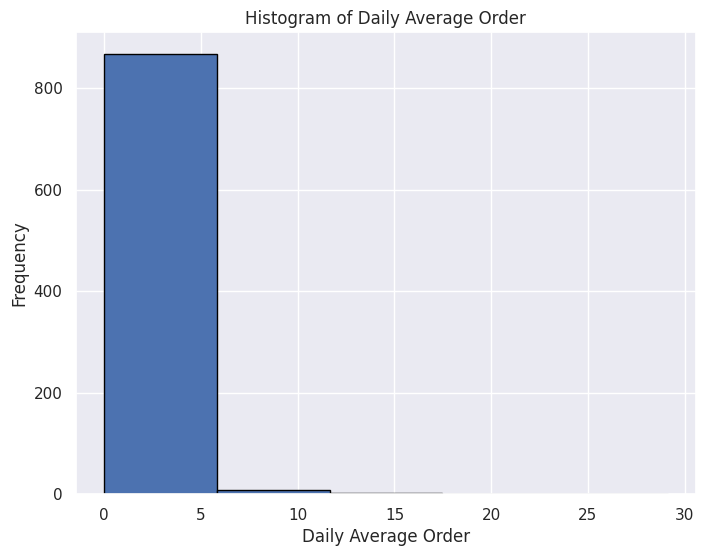

In [72]:
bins = pd.cut(cohort['daily_avg_order'], bins=5, retbins=True, labels=False)  # 不指定箱的数量，让cut()自动确定

plt.figure(figsize=(8, 6))
plt.hist(cohort['daily_avg_order'], bins=bins[1], edgecolor='black')  # 使用cut()返回的边界
plt.xlabel('Daily Average Order')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Average Order')
plt.grid(True)

plt.show()

# others

## City yield



1.   City A doesn't have the most hotels but have the highest order volume.  
2.   City B have the mose hotels but have lowest order volume.
3.   City D have the least hotels but order volume is the second highest.  
4.   C&D have high-value hotels.




In [73]:
groupby = ['city']
agg = {
    'hotel_id':'nunique'
    ,'order_id':'count'
    ,'revenue':'sum'
}
city = agg_func(all_df,groupby,agg)
city


,city,hotel_id_nunique,order_id_count,revenue_sum
0,A,213,22366,3.897959e+06
1,B,344,4932,1.082585e+06
2,C,146,6797,2.752435e+06
3,D,70,10152,3.760328e+06
4,E,107,4817,1.059257e+06


In [74]:
groupby = ['city','star_type']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
city_star = agg_func(all_df,groupby,agg,subgroup_pct)
city_star

,city,star_type,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
0,A,high,44,150.427519,9475,2.575193e+06,0.206573,0.423634,0.660651
1,A,low,80,53.298228,3079,2.840182e+05,0.375587,0.137664,0.072863
2,A,medium,89,67.118446,9812,1.038749e+06,0.417840,0.438702,0.266485
3,B,high,97,175.900519,2252,7.442755e+05,0.281977,0.456610,0.687498
4,B,low,114,49.226429,702,6.263271e+04,0.331395,0.142336,0.057855
5,B,medium,133,77.281100,1978,2.756767e+05,0.386628,0.401054,0.254647
6,C,high,12,503.332363,1108,9.934155e+05,0.082192,0.163013,0.360922
7,C,low,93,92.210500,1996,3.093606e+05,0.636986,0.293659,0.112395
8,C,medium,41,212.967551,3693,1.449659e+06,0.280822,0.543328,0.526682
9,D,high,14,274.573803,4594,2.088635e+06,0.200000,0.452522,0.555440


## By hotel type

In [75]:
groupby = ['accommodation_type_name']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
hotel_type = agg_func(all_df,groupby,agg).sort_values(by='hotel_id_nunique',ascending=False)
hotel_type


,accommodation_type_name,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum
7,Hotel,327,158.130377,35441,9.786907e+06
3,Guest House / Bed & Breakfast,159,85.763141,2758,3.947205e+05
11,Resort,102,190.981311,3525,1.099495e+06
0,Apartment,70,196.309749,239,9.161767e+04
6,Hostel,58,88.781364,2774,4.021480e+05
14,Serviced Apartment,57,90.070825,2797,4.359708e+05
12,Resort Villa,54,259.492543,397,1.840585e+05
1,Bungalow,16,71.865798,142,2.024896e+04
10,Private Villa,12,338.963333,18,1.056336e+04
2,Capsule Hotel,8,61.312571,822,7.346635e+04


In [76]:
groupby = ['city','accommodation_type_name']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
hotel_type = agg_func(all_df,groupby,agg,subgroup_pct).sort_values(by=groupby,ascending=False)
hotel_type


,city,accommodation_type_name,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
43,E,Serviced Apartment,14,38.489558,302,1.970389e+04,0.130841,0.062695,0.018602
42,E,Resort Villa,8,419.176156,98,6.113075e+04,0.074766,0.020345,0.057711
41,E,Resort,9,222.371113,1436,4.614835e+05,0.084112,0.298111,0.435667
40,E,Private Villa,2,309.260000,3,1.938280e+03,0.018692,0.000623,0.001830
39,E,Hotel,46,109.394939,2540,4.614114e+05,0.429907,0.527299,0.435599
38,E,Hostel,2,30.008419,78,3.802360e+03,0.018692,0.016193,0.003590
37,E,Home,1,140.560000,1,1.405600e+02,0.009346,0.000208,0.000133
36,E,Guest House / Bed & Breakfast,16,86.597229,341,4.737970e+04,0.149533,0.070791,0.044729
35,E,Bungalow,1,26.980000,1,2.698000e+01,0.009346,0.000208,0.000025
34,E,Apartment,8,87.479412,17,2.239820e+03,0.074766,0.003529,0.002115


In [77]:
all_df.groupby('chain_hotel').agg({'hotel_id':'nunique'
        ,'ADR_USD':'mean'
        ,'booking_date':'count'
        ,'revenue':'sum'
        }
        ).sort_values(by='hotel_id',ascending=False)

,hotel_id,ADR_USD,booking_date,revenue
chain_hotel,,,,
non-chain,725,128.842094,35827,7.930654e+06
chain,155,200.182642,13237,4.621910e+06


## By booking dayofweek

In [78]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


## By advance booking days

In [79]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


    days_book_in_advance  hotel_amt         ADR  order_amt       revenue
0                      0        552  119.256034       5606  8.840617e+05
1                      1        557  126.904330       5666  1.101039e+06
2                      2        448  134.063562       2962  6.318975e+05
3                      3        409  139.460603       2430  5.537220e+05
4                      4        371  138.774256       2050  4.798747e+05
5                      5        352  148.217584       1763  4.255021e+05
6                      6        335  140.577476       1585  3.732786e+05
7                      7        312  150.129580       1420  3.653149e+05
8                      8        308  152.810496       1277  3.271942e+05
9                      9        298  156.190370       1210  3.169906e+05
10                    10        282  151.646822       1070  2.892328e+05
11                    11        270  156.743437       1016  2.832046e+05
12                    12        276  147.406670    

<Axes: xlabel='days_book_in_advance', ylabel='ADR'>

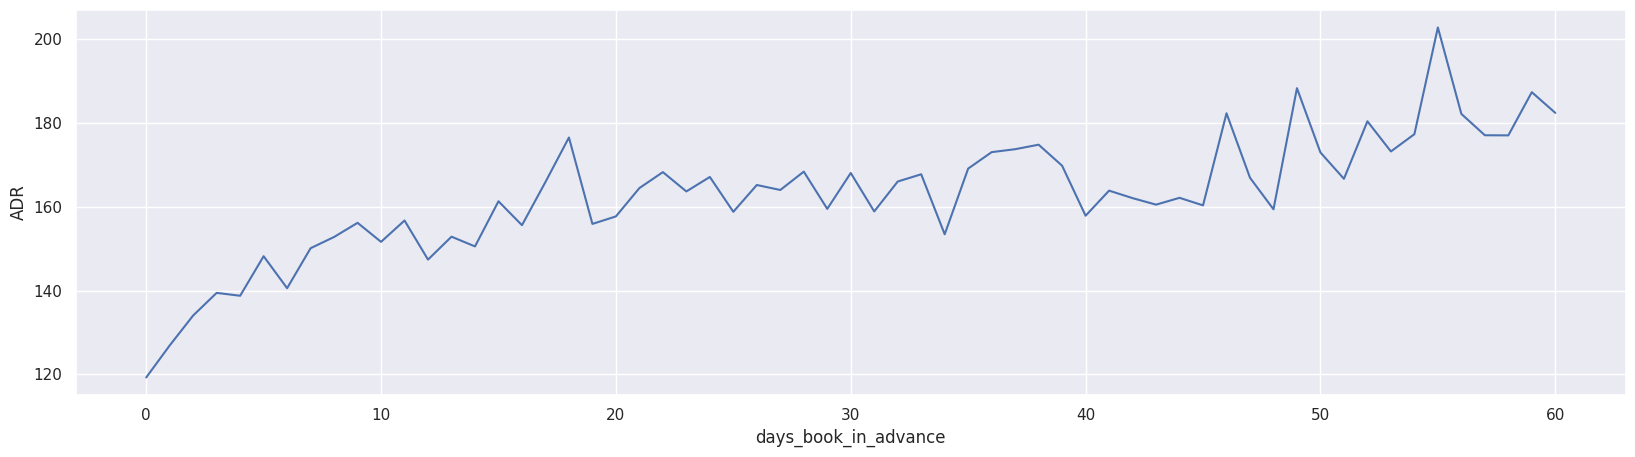

In [80]:
advance_booking_days = all_df[all_df['days_book_in_advance']!=-1].groupby('days_book_in_advance').agg({'hotel_id':'nunique'
                  ,'ADR_USD':'mean'
                  ,'booking_date':'count'
                  ,'revenue':'sum'
                  }
                  ).reset_index()
advance_booking_days.columns=['days_book_in_advance','hotel_amt','ADR','order_amt','revenue']
print(advance_booking_days)

sns.set_style('darkgrid')
sns.lineplot(data=advance_booking_days,x='days_book_in_advance',y='ADR')

# User perspective

# Hotel perspective

## different hotel type， different booking pattern

In [81]:
all_df.columns

Index(['order_id', 'ADR_USD', 'hotel_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date', 'days_book_in_advance',
       'weeks_book_in_advance', 'stay_nights', 'booking_dow', 'checkin_dow',
       'city', 'star_type', 'revenue'],
      dtype='object')

Several types of hotel need to be booked earlier

## whole period

In [82]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


In [83]:
sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (20, 5)})
city = 'C'
plt.pie(city_hotel_type[city_hotel_type['city']==city]['hotel_id_count'], labels=city_hotel_type[city_hotel_type['city']==city]['accommodation_type_name'])

# plt.title('Lead time - hotel type', fontsize=16)

# #add axis titles
# plt.xlabel('Accommodation type')
# plt.ylabel('Order volume %')
# plt.legend(loc='lower right',fontsize=10)

# #rotate x-axis labels
# plt.xticks(rotation=90)

KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt

cities = ['A','B','C','D','E']



# 创建一个子图网格，3 行 2 列，用于显示多个饼状图
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

n=0
for i in range(3):
    for j in range(2):
        # 计算每个子图的索引
        index = i * 2 + j
        city = cities[n]
        n+=1
        # 创建饼状图
        axs[i, j].pie(city_hotel_type[city_hotel_type['city']==city]['hotel_id_count'], labels=city_hotel_type[city_hotel_type['city']==city]['accommodation_type_name'])
        axs[i, j].set_title(city)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


In [ ]:
groupby = ['checkin_date','city']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}

city_trend = agg_func(all_df,groupby,agg)
city_trend.head()

In [ ]:
sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (20, 5)})

sns.lineplot(data=city_trend, x='checkin_date', y='order_id_count', hue='city')

plt.title('Lead time - hotel type', fontsize=16)

#add axis titles
plt.xlabel('Accommodation type')
plt.ylabel('Order volume %')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
plt.xticks(rotation=90)

E might be a tourism city

In [ ]:
fig, ax2 = plt.subplots(figsize=(10,5))
sns.set_style('dark')

ax2.set_title('aaa',fontsize=16)
ax2.set_xlabel('days_book_in_advance')
ax2 = sns.barplot(data=a_cohort_df,x='days_book_in_advance',y='order_volume_pct',label='order_volume_pct')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
# ax2.set_xticklabels(a_cohort_df['days_book_in_advance'], rotation=90)
custom_xticks = a_cohort_df[a_cohort_df['days_book_in_advance']%5==0]['days_book_in_advance']
ax2.set_xticks(custom_xticks)

ax1 = ax2.twinx()
ax1.set_ylabel('avg_ADR_USD')
ax1 = sns.lineplot(data=a_cohort_df,x='days_book_in_advance',y='avg_ADR_USD',marker='o',color='g',label='avg_ADR_USD')
ax1.set_ylim(90,130) # to not cover the line

plt.show()

In [ ]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
}
subgroup_pct = {
    'group':['accommodation_type_name']
    ,'percentage':{'order_id':'count'}
}
hotel_type_advance_days = agg_func(all_df,groupby,agg,subgroup_pct)


sns.set_style('darkgrid')
sns.lineplot(data=hotel_type_advance_days,x='weeks_book_in_advance',y='order_id_count_pct',hue='accommodation_type_name')

In [ ]:
a_cohort = a.groupby('days_book_in_advance').agg({'ADR_USD':'mean','#':'count'})
a_cohort_df = a_cohort.reset_index()
a_cohort_df.columns = ['days_book_in_advance','avg_ADR_USD','order_volume']
a_cohort_df

In [ ]:
# anomoly check
a[a['days_book_in_advance']==-1]

In [ ]:
a_cohort_df = a_cohort_df[a_cohort_df['days_book_in_advance']!=-1]
a_cohort_df['order_volume_pct']=a_cohort_df['order_volume']/(a_cohort_df['order_volume'].sum())
a_cohort_df

In [ ]:
sns.set_style('darkgrid')
sns.regplot(data=a_cohort_df, x="days_book_in_advance", y="avg_ADR_USD",  order = 3);


In [ ]:
fig, ax2 = plt.subplots(figsize=(10,5))
sns.set_style('dark')

ax2.set_title('aaa',fontsize=16)
ax2.set_xlabel('days_book_in_advance')
ax2 = sns.barplot(data=a_cohort_df,x='days_book_in_advance',y='order_volume_pct',label='order_volume_pct')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
# ax2.set_xticklabels(a_cohort_df['days_book_in_advance'], rotation=90)
custom_xticks = a_cohort_df[a_cohort_df['days_book_in_advance']%5==0]['days_book_in_advance']
ax2.set_xticks(custom_xticks)

ax1 = ax2.twinx()
ax1.set_ylabel('avg_ADR_USD')
ax1 = sns.lineplot(data=a_cohort_df,x='days_book_in_advance',y='avg_ADR_USD',marker='o',color='g',label='avg_ADR_USD')
ax1.set_ylim(90,130) # to not cover the line

plt.show()

In [ ]:
import numpy as np
cumsum = a_cohort_df['order_volume_pct'].cumsum()
n_components = np.argmax(cumsum >= 0.50) + 1
n_components

Most people book hotel when it's near the time they check in, over half customers book within 8 dyas ahead of checkin.  
As time approaching checkin date, price will decrease.  
  
So we can't use the 'price' reason to persuad customer to order soon.

# stay nights

In [ ]:
all_df.head()

In [ ]:
groupby = ['stay_nights']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}

staynights = agg_func(all_df,groupby,agg)
staynights

In [ ]:
fig = plt.subplots(figsize=(10,5))
sns.set_style('darkgrid')

sns.lineplot(data=a_stay_nights_df, x='days_book_in_advance', y='avg_ADR_USD', hue='stay_nights')

plt.show()